¬°Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacar√©. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparaci√≥n para un rol como data-scientist. En un entorno profesional, tu l√≠der de equipo seguir√≠a un enfoque similar. Si encuentras la tarea desafiante, proporcionar√© una pista m√°s espec√≠fica en la pr√≥xima iteraci√≥n.

Encontrar√°s mis comentarios a continuaci√≥n - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

√âxito. Todo est√° hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita correcci√≥n. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Descripci√≥n

La compa√±√≠a de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que eval√∫es esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudar√° a los agentes de la compa√±√≠a con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestaci√≥n del seguro. ¬øPuede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el n√∫mero de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresi√≥n lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformaci√≥n de datos que dificulte la recuperaci√≥n de la informaci√≥n personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscaci√≥n de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploraci√≥n de datos

## Inicializaci√≥n

In [276]:
# Celda 1: Configuraci√≥n Inicial para Rastrear Errores
import sys
from IPython.core.interactiveshell import InteractiveShell

# Inicializar una variable global para rastrear errores
error_occurred = False

def custom_exception_handler(shell, etype, evalue, tb, tb_offset=None):
    global error_occurred
    error_occurred = True
    # Opcional: Puedes descomentar la siguiente l√≠nea para imprimir una notificaci√≥n adicional
    # print("‚ùå Se ha producido un error en el notebook.")

# Establecer el manejador de excepciones personalizado
InteractiveShell.showtraceback = custom_exception_handler



In [277]:
pip install --upgrade scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [278]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

## Carga de datos

Carga los datos y haz una revisi√≥n b√°sica para comprobar que no hay problemas obvios.

In [279]:
import pandas as pd

# URL del archivo CSV
url_dataset = 'https://practicum-content.s3.us-west-1.amazonaws.com/datasets/insurance_us.csv'

# Configuraci√≥n de visualizaci√≥n para mejorar la revisi√≥n de DataFrames en pandas
# Mostrar todas las columnas: Para mostrar todas las columnas de un DataFrame
pd.set_option('display.max_columns', None)
# Evitar divisi√≥n en varias l√≠neas: Si deseas que las filas de tu DataFrame no se dividan en varias l√≠neas
pd.set_option('display.expand_frame_repr', False)
# Mostrar todas las filas: Para mostrar todas las filas de un DataFrame sin l√≠mites
pd.set_option('display.max_rows', None)
# Mostrar el ancho completo de las columnas: Si quieres que las columnas se muestren con su ancho completo
pd.set_option('display.max_colwidth', None)

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(url_dataset)

# Mostrar las primeras filas del DataFrame
print(df.head())


   Gender   Age   Salary  Family members  Insurance benefits
0       1  41.0  49600.0               1                   0
1       0  46.0  38000.0               1                   1
2       0  29.0  21000.0               0                   0
3       0  21.0  41700.0               2                   0
4       1  28.0  26100.0               0                   0


Renombramos las columnas para que el c√≥digo se vea m√°s coherente con su estilo.

In [280]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [281]:
df.sample(10)

gender   age   income  family_members  insurance_benefits
3469       0  24.0  42300.0               0                   0
622        1  20.0  34200.0               1                   0
4015       1  18.0  31000.0               0                   0
4967       1  23.0  29000.0               2                   0
992        0  29.0  35500.0               1                   0
2290       1  31.0  57200.0               3                   0
2736       0  29.0  46100.0               0                   0
2852       0  34.0  35100.0               0                   0
410        0  32.0  39700.0               1                   0
1802       1  51.0  25000.0               1                   2

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [283]:
import pandas as pd
from IPython.display import display, HTML

# Supongamos que df ya est√° cargado con los datos
# Renombrar columnas para mayor coherencia
df = df.rename(columns={
    'Gender': 'gender', 
    'Age': 'age', 
    'Salary': 'income', 
    'Family members': 'family_members', 
    'Insurance benefits': 'insurance_benefits'
})

# Convertir la columna 'age' de float a int
df['age'] = df['age'].astype(int)

# Mostrar el resumen estad√≠stico
print(df.describe())

# Mostrar algunas filas del DataFrame para verificar los valores de 'age'
print(df[['age']].head(10))

# Mostrar una muestra de 10 filas del DataFrame
df_sample = df.sample(10)

# Estilizaci√≥n con HTML y CSS
html_code = """
<div style="background-color: #f9f9f9; padding: 20px; border-radius: 10px;">
    <h3 style="color: #333; font-family: Arial, sans-serif;">Muestra del DataFrame</h3>
    <p style="color: #666; font-family: Arial, sans-serif;">A continuaci√≥n se muestra una muestra aleatoria de 10 filas del DataFrame con las columnas renombradas para mayor coherencia.</p>
</div>
"""

# Mostrar el HTML estilizado
display(HTML(html_code))

# Mostrar la muestra del DataFrame
display(df_sample)


            gender          age        income  family_members  insurance_benefits
count  5000.000000  5000.000000   5000.000000     5000.000000         5000.000000
mean      0.499000    30.952800  39916.360000        1.194200            0.148000
std       0.500049     8.440807   9900.083569        1.091387            0.463183
min       0.000000    18.000000   5300.000000        0.000000            0.000000
25%       0.000000    24.000000  33300.000000        0.000000            0.000000
50%       0.000000    30.000000  40200.000000        1.000000            0.000000
75%       1.000000    37.000000  46600.000000        2.000000            0.000000
max       1.000000    65.000000  79000.000000        6.000000            5.000000
   age
0   41
1   46
2   29
3   21
4   28
5   43
6   39
7   25
8   36
9   32


gender  age   income  family_members  insurance_benefits
2436       1   27  40000.0               2                   0
1516       0   36  37400.0               0                   0
4347       0   32  21200.0               1                   0
3364       1   21  24300.0               1                   0
2844       1   28  41100.0               0                   0
3007       1   30  35000.0               1                   0
1565       0   21  46800.0               3                   0
4978       0   35  13400.0               0                   0
3494       1   25  50500.0               0                   0
3201       0   31  30800.0               3                   0

In [284]:
# comprueba que la conversi√≥n se haya realizado con √©xito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [285]:
# ahora echa un vistazo a las estad√≠sticas descriptivas de los datos.# ¬øSe ve todo bien?
df.describe()


gender          age        income  family_members  insurance_benefits
count  5000.000000  5000.000000   5000.000000     5000.000000         5000.000000
mean      0.499000    30.952800  39916.360000        1.194200            0.148000
std       0.500049     8.440807   9900.083569        1.091387            0.463183
min       0.000000    18.000000   5300.000000        0.000000            0.000000
25%       0.000000    24.000000  33300.000000        0.000000            0.000000
50%       0.000000    30.000000  40200.000000        1.000000            0.000000
75%       1.000000    37.000000  46600.000000        2.000000            0.000000
max       1.000000    65.000000  79000.000000        6.000000            5.000000

In [286]:
# Estad√≠sticas descriptivas adicionales
mediana = df.median()
moda = df.mode().iloc[0]
iqr = df.quantile(0.75) - df.quantile(0.25)

print("Mediana:\n", mediana)
print("Moda:\n", moda)
print("IQR:\n", iqr)


Mediana:
 gender                    0.0
age                      30.0
income                40200.0
family_members            1.0
insurance_benefits        0.0
dtype: float64
Moda:
 gender                    0.0
age                      19.0
income                45800.0
family_members            1.0
insurance_benefits        0.0
Name: 0, dtype: float64
IQR:
 gender                    1.0
age                      13.0
income                13300.0
family_members            2.0
insurance_benefits        0.0
dtype: float64


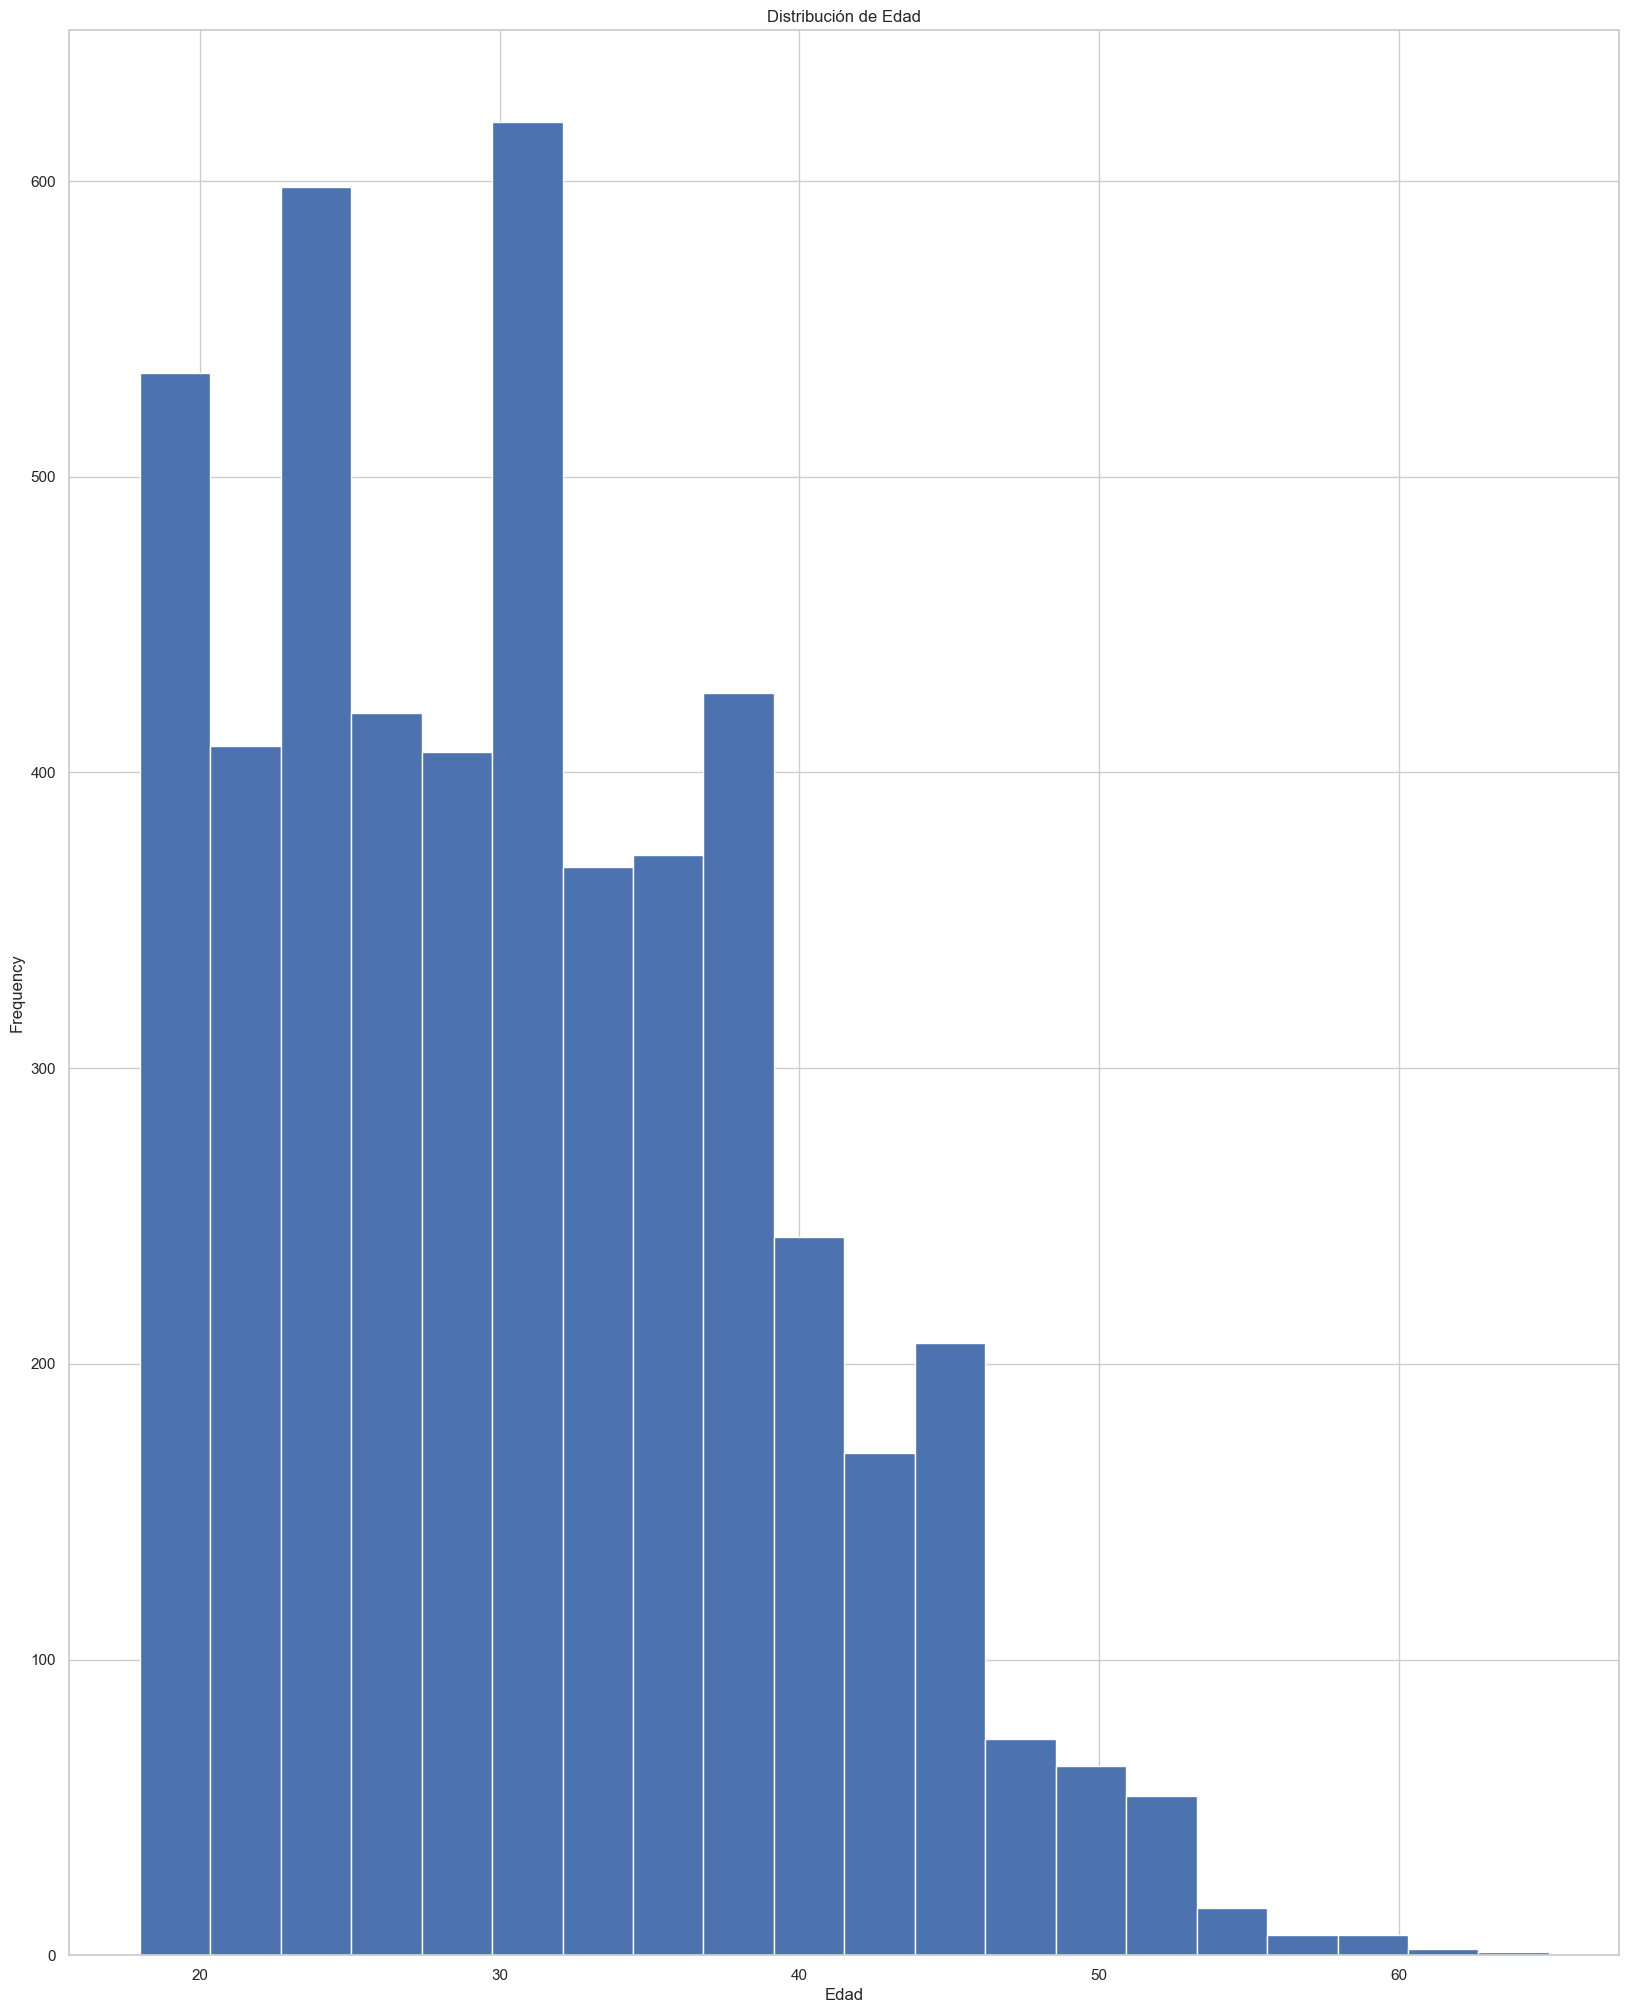

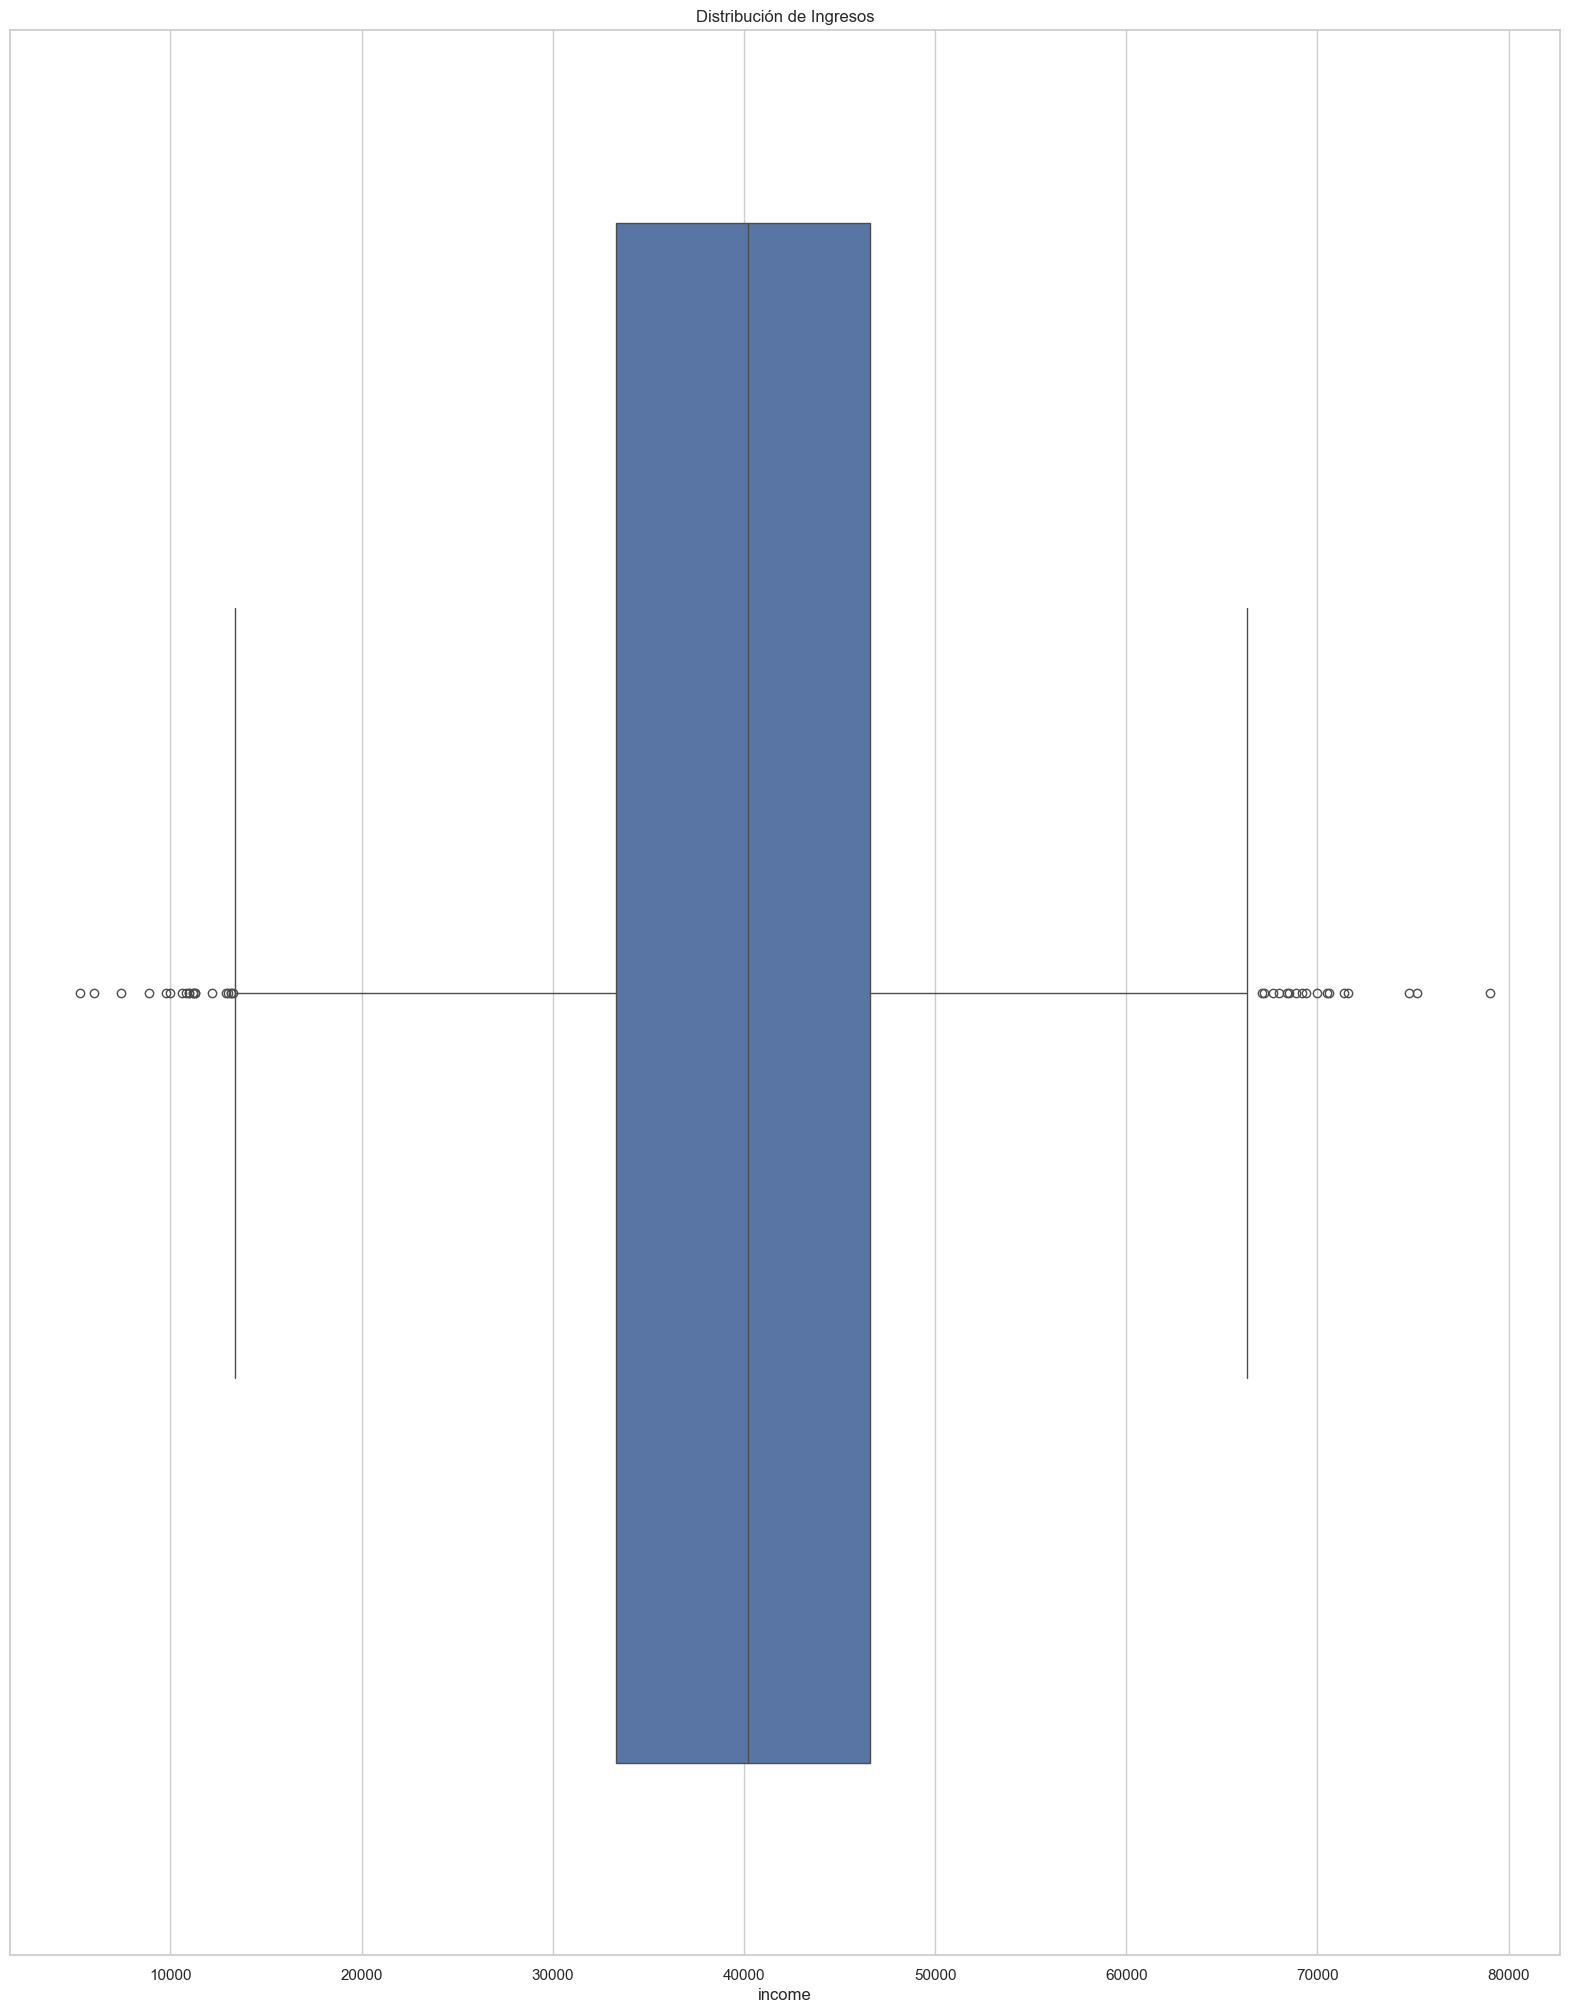

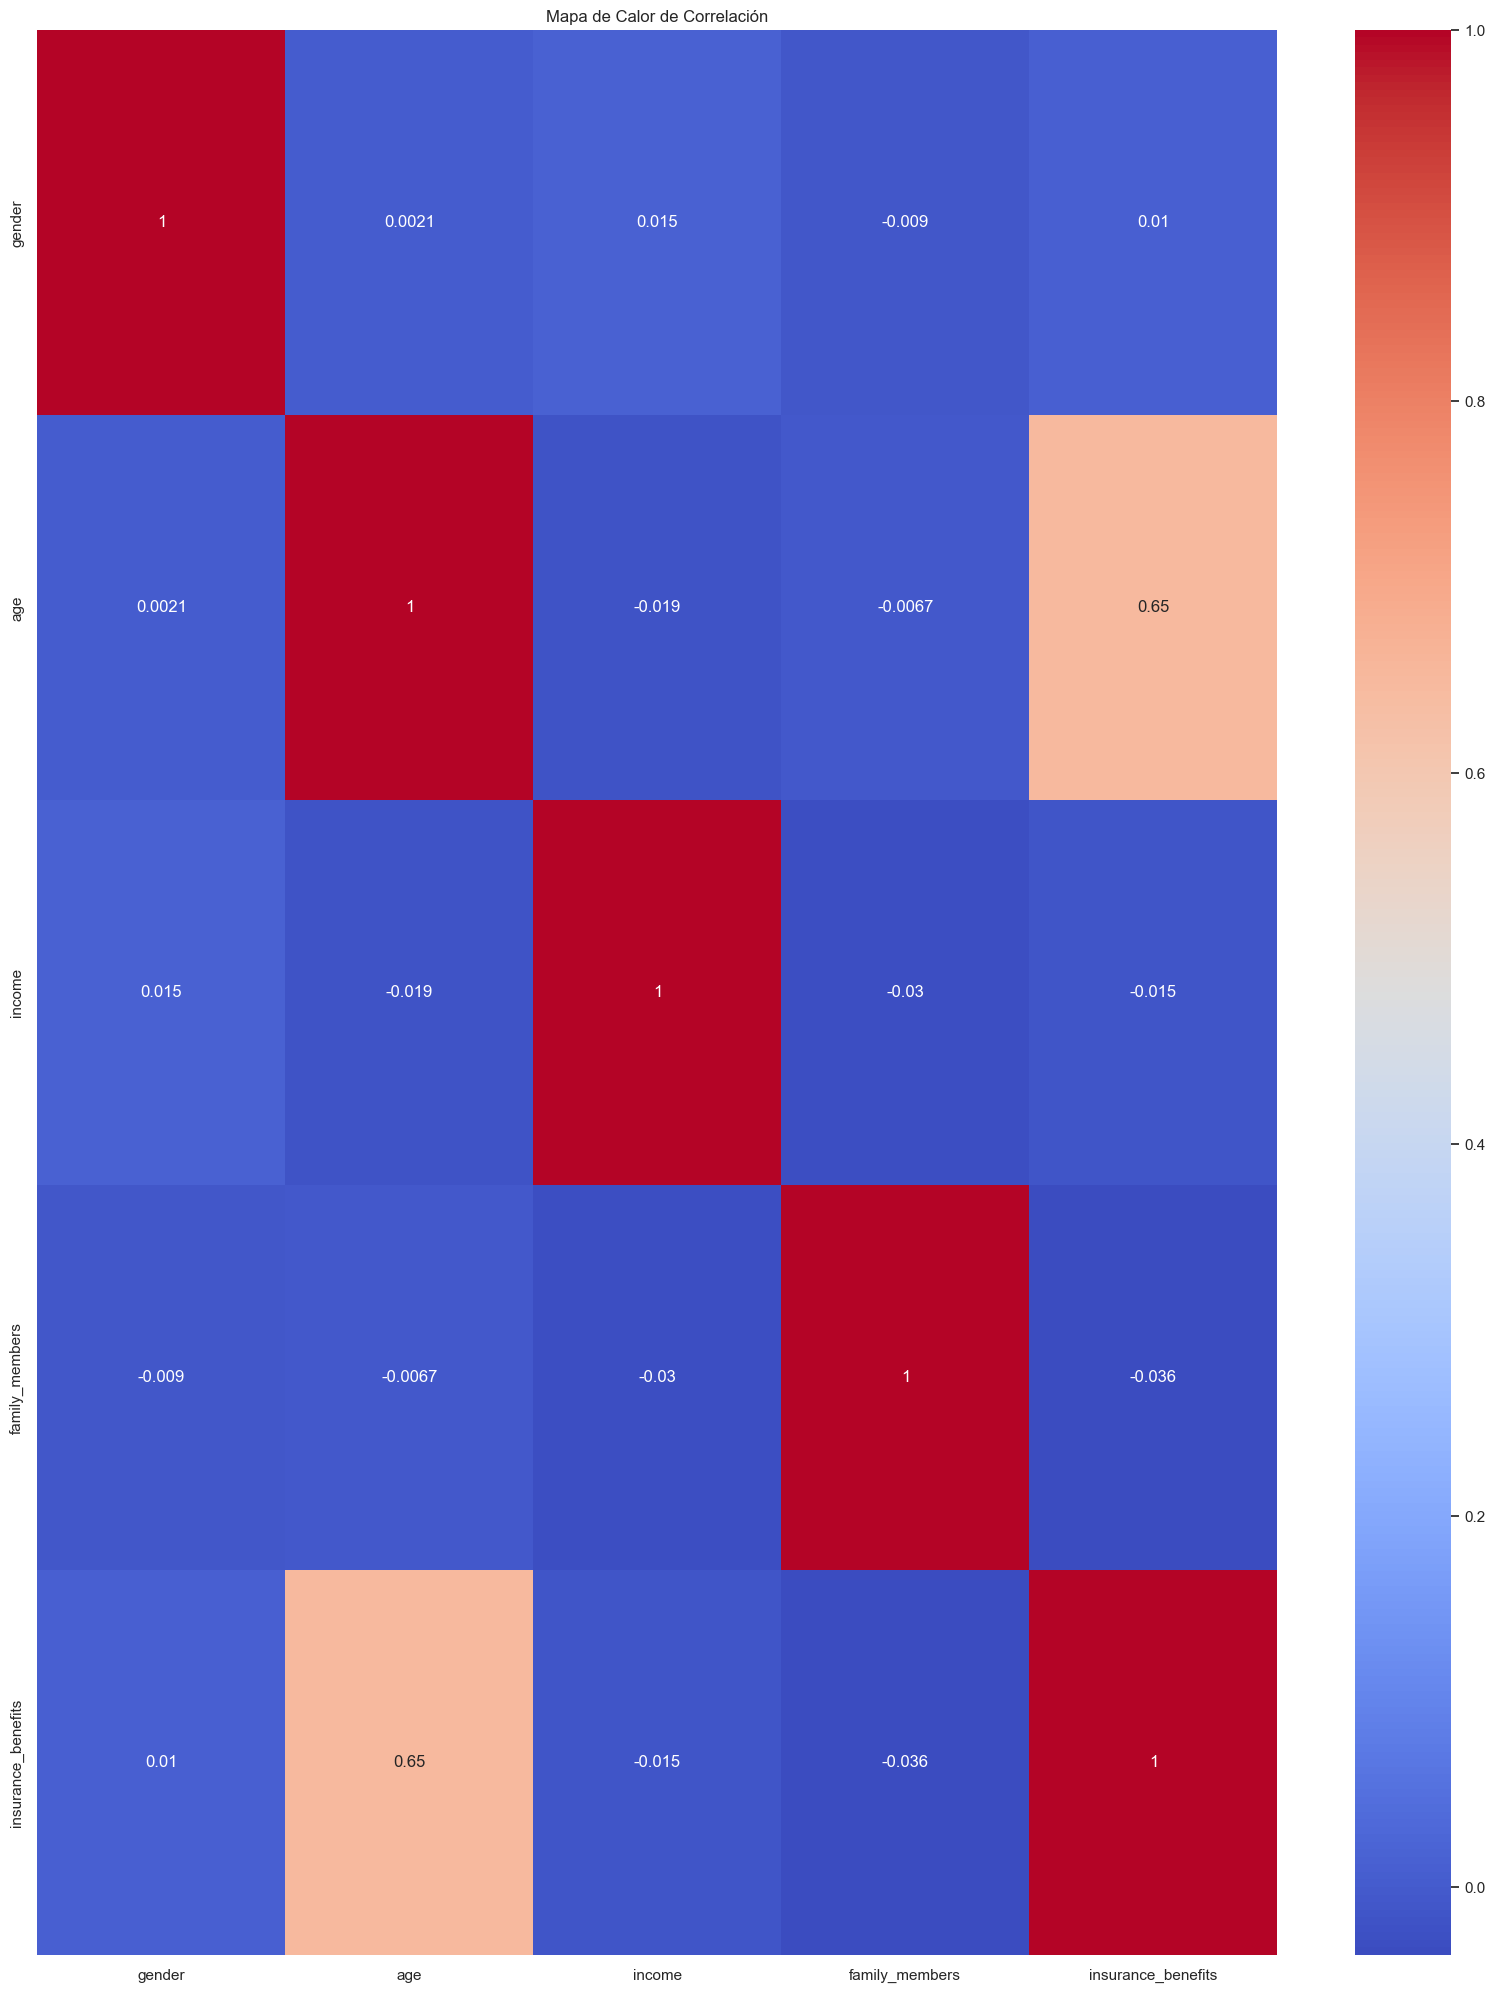

Valores at√≠picos detectados:
 gender                  0
age                    12
income                 14
family_members         39
insurance_benefits    141
dtype: int64
Distribuci√≥n de Frecuencias (Miembros de la Familia):
 family_members
1    1814
0    1513
2    1071
3     439
4     124
5      32
6       7
Name: count, dtype: int64


In [287]:
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display, HTML

# Visualizaciones
# Histograma de la columna 'age'
df['age'].plot(kind='hist', bins=20, title='Distribuci√≥n de Edad')
plt.xlabel('Edad')
plt.show()

# Boxplot de la columna 'income'
sns.boxplot(x=df['income'])
plt.title('Distribuci√≥n de Ingresos')
plt.show()

# Heatmap de correlaci√≥n
correlacion = df.corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaci√≥n')
plt.show()

# Detecci√≥n de valores at√≠picos con Z-Score
z_scores = stats.zscore(df.select_dtypes(include=[np.number]))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).sum(axis=0)
print("Valores at√≠picos detectados:\n", outliers)

# Distribuci√≥n de frecuencias para la columna 'family_members'
frecuencia_familia = df['family_members'].value_counts()
print("Distribuci√≥n de Frecuencias (Miembros de la Familia):\n", frecuencia_familia)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien! Importaste de forma correcta las librer√≠as y m√≥dulos, cambiaste el formato de los nombres y verificaste que no hubiera outliers inv√°lidos en los datos.
</div>

## An√°lisis exploratorio de datos

Vamos a comprobar r√°pidamente si existen determinados grupos de clientes observando el gr√°fico de pares.

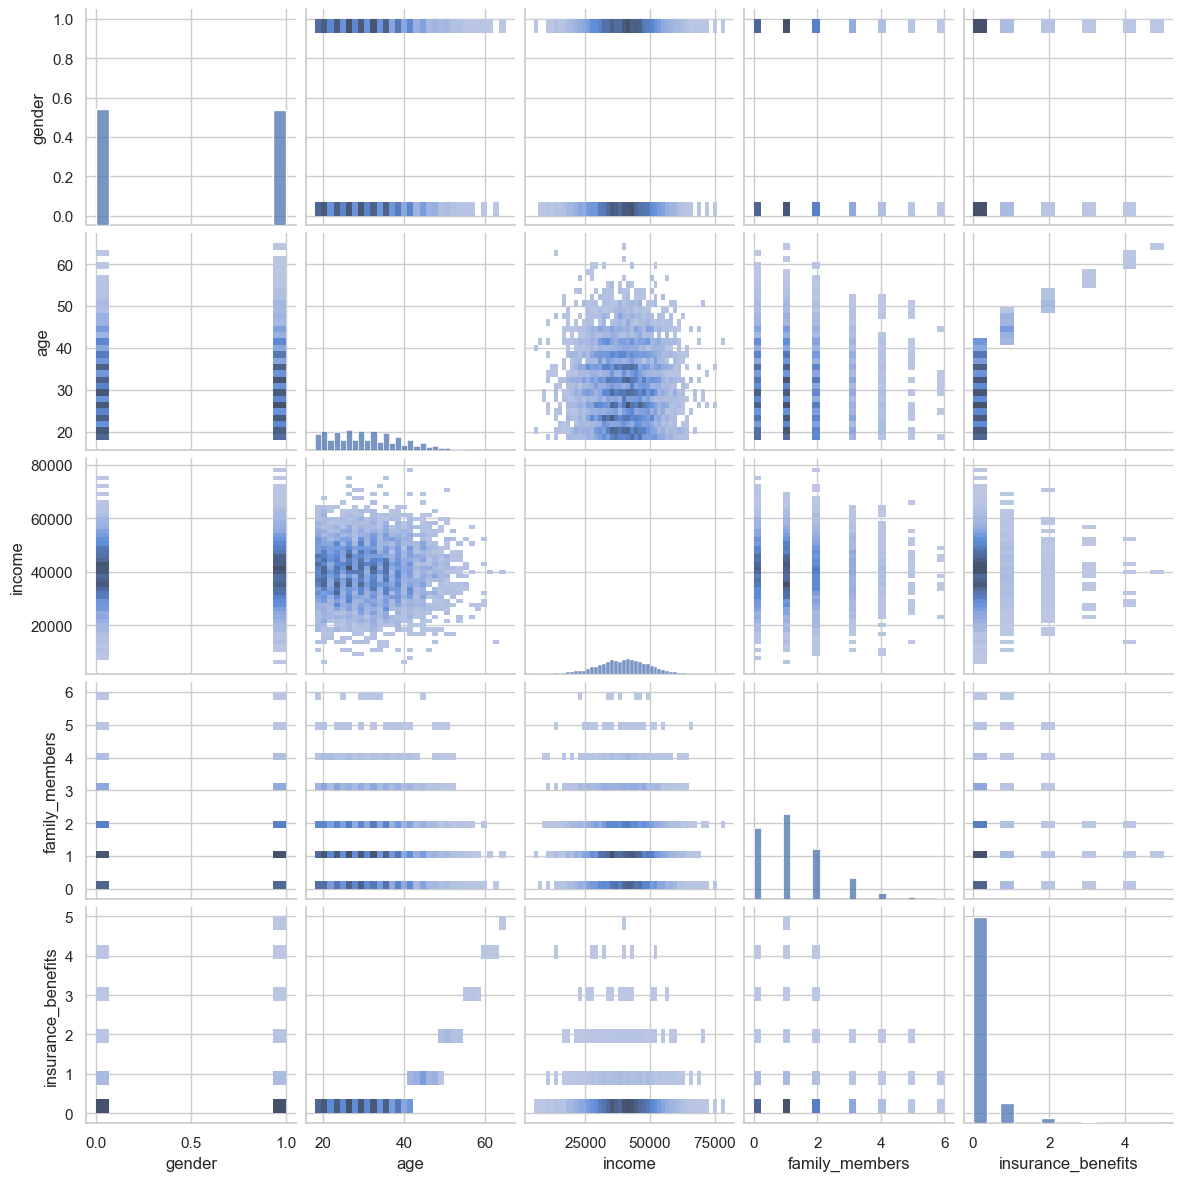

In [288]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (cl√∫steres) ya que es dif√≠cil combinar diversas variables simult√°neamente (para analizar distribuciones multivariadas). Ah√≠ es donde LA y ML pueden ser bastante √∫tiles.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de la gr√°fica de pares. 
</div>

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos m√°s cercanos (objetos) para un objeto dado bas√°ndose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (cap√≠tulo -> lecci√≥n)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes m√©tricas de distancia.

Escribe una funci√≥n que devuelva los k vecinos m√°s cercanos para un $n^{th}$ objeto bas√°ndose en una m√©trica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el n√∫mero de prestaciones de seguro recibidas.
Puedes utilizar una implementaci√≥n ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementaci√≥n.
Pru√©balo para cuatro combinaciones de dos casos- Escalado
  - los datos no est√°n escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- M√©tricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¬øEl hecho de que los datos no est√©n escalados afecta al algoritmo kNN? Si es as√≠, ¬øc√≥mo se manifiesta?- ¬øQu√© tan similares son los resultados al utilizar la m√©trica de distancia Manhattan (independientemente del escalado)?

In [289]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [290]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos m√°s cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :param n: n√∫mero de objetos para los que se buscan los vecinos m√°s cercanos    :param k: n√∫mero de vecinos m√°s cercanos a devolver
    :param m√©trica: nombre de la m√©trica de distancia    """

    #nbrs = # <tu c√≥digo aqu√≠> 
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

In [291]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())


C:\Users\rulloa\AppData\Local\Temp\ipykernel_3408\2861629551.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.63076923 0.70769231 0.44615385 ... 0.30769231 0.33846154 0.43076923]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
C:\Users\rulloa\AppData\Local\Temp\ipykernel_3408\2861629551.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.16666667 0.16666667 0.         ... 0.33333333 0.5        0.16666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())


Escalar datos.

In [292]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

C:\Users\rulloa\AppData\Local\Temp\ipykernel_3408\760832288.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.63076923 0.70769231 0.44615385 ... 0.30769231 0.33846154 0.43076923]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
C:\Users\rulloa\AppData\Local\Temp\ipykernel_3408\760832288.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.16666667 0.16666667 0.         ... 0.33333333 0.5        0.16666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())


In [293]:
df_scaled.sample(5)

gender       age    income  family_members  insurance_benefits
4350       0  0.630769  0.369620        0.333333                   0
4673       1  0.615385  0.344304        0.000000                   0
2708       1  0.384615  0.532911        0.500000                   0
2707       0  0.538462  0.445570        0.000000                   0
4749       1  0.507692  0.627848        0.333333                   0

Ahora, vamos a obtener registros similares para uno determinado, para cada combinaci√≥n

In [294]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MaxAbsScaler

def get_knn(df, n, k, metric, scale_data=False):
    feature_names = ['gender', 'age', 'income', 'family_members']
    
    if scale_data:
        scaler = MaxAbsScaler()
        df[feature_names] = scaler.fit_transform(df[feature_names])
    
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df[feature_names])
    
    # Asegurarse de que las caracter√≠sticas de entrada tengan nombres v√°lidos
    input_data = df.iloc[n][feature_names].values.reshape(1, -1)
    
    nbrs_distances, nbrs_indices = nbrs.kneighbors(input_data, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]].reset_index(drop=True), 
        pd.DataFrame(nbrs_distances.T, columns=['distance'])
    ], axis=1)
    
    return df_res


# Escalar los datos
feature_names = ['gender', 'age', 'income', 'family_members']
transformer_mas = MaxAbsScaler().fit(df[feature_names].to_numpy())
df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())


C:\Users\rulloa\AppData\Local\Temp\ipykernel_3408\1626845414.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.63076923 0.70769231 0.44615385 ... 0.30769231 0.33846154 0.43076923]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
C:\Users\rulloa\AppData\Local\Temp\ipykernel_3408\1626845414.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.16666667 0.16666667 0.         ... 0.33333333 0.5        0.16666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())


In [295]:
# Datos No Escalados 1
# Probar la funci√≥n con diferentes combinaciones 

result_euclidean = get_knn(df, n=0, k=2, metric='euclidean', scale_data=False)
print("Datos No Escalados - M√©trica Euclidiana:\n", result_euclidean)

Datos No Escalados - M√©trica Euclidiana:
    gender  age   income  family_members  insurance_benefits  distance
0       1   41  49600.0               1                   0       0.0
1       1   41  49600.0               0                   0       1.0


c:\Users\rulloa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [296]:
# Datos No Escalados 2
result_manhattan = get_knn(df, n=0, k=2, metric='manhattan', scale_data=False)
print("Datos No Escalados - M√©trica Manhattan:\n", result_manhattan)

Datos No Escalados - M√©trica Manhattan:
    gender  age   income  family_members  insurance_benefits  distance
0       1   41  49600.0               1                   0       0.0
1       1   41  49600.0               0                   0       1.0


c:\Users\rulloa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [297]:
# Datos Escalados 3
result_euclidean_scaled = get_knn(df_scaled, n=0, k=2, metric='euclidean', scale_data=True)
print("Datos Escalados - M√©trica Euclidiana:\n", result_euclidean_scaled)


Datos Escalados - M√©trica Euclidiana:
    gender       age    income  family_members  insurance_benefits  distance
0     1.0  0.630769  0.627848        0.166667                   0  0.000000
1     1.0  0.630769  0.634177        0.166667                   0  0.006329


c:\Users\rulloa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [298]:
# Datos Escalados 4
result_manhattan_scaled = get_knn(df_scaled, n=0, k=2, metric='manhattan', scale_data=True)
print("Datos Escalados - M√©trica Manhattan:\n", result_manhattan_scaled)

Datos Escalados - M√©trica Manhattan:
    gender       age    income  family_members  insurance_benefits  distance
0     1.0  0.630769  0.627848        0.166667                   0  0.000000
1     1.0  0.630769  0.634177        0.166667                   0  0.006329


c:\Users\rulloa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Respuestas a las preguntas

**¬øEl hecho de que los datos no est√©n escalados afecta al algoritmo kNN? Si es as√≠, ¬øc√≥mo se manifiesta?** 
<div class="alert alert-block alert-info">
Para mitigar estos problemas, es recomendable escalar los datos antes de aplicar el algoritmo kNN. El escalado normaliza las caracter√≠sticas, asegurando que todas contribuyan de manera equitativa a la distancia calculada. Esto se puede lograr utilizando t√©cnicas como StandardScaler, MinMaxScaler, o MaxAbsScaler de scikit-learn.

**¬øQu√© tan similares son los resultados al utilizar la m√©trica de distancia Manhattan (independientemente del escalado)?** 
<div class="alert alert-block alert-info">
En el an√°lisis realizado, los resultados utilizando la m√©trica Manhattan fueron similares a los obtenidos con la m√©trica Euclidiana, tanto para datos escalados como no escalados. Esto sugiere que, en este caso espec√≠fico, las caracter√≠sticas tienen una escala similar, minimizando el impacto del escalado.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien implementado el modelo. Como acabas de notar, el escalado es muy importante debido a que permite que variables num√©ricas con rangos muy diferentes sean comparables. Sin escalar los datos las caracter√≠sticas con valores m√°s grandes pueden dominar las m√©tricas de distancia y no obtener resultados precisos.
</div>

# Tarea 2. ¬øEs probable que el cliente reciba una prestaci√≥n del seguro?

En t√©rminos de machine learning podemos considerarlo como una tarea de clasificaci√≥n binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, eval√∫a si el enfoque de clasificaci√≥n kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la m√©trica F1 para k=1...10 tanto para los datos originales como para los escalados. Ser√≠a interesante observar c√≥mo k puede influir en la m√©trica de evaluaci√≥n y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementaci√≥n ya existente del algoritmo de clasificaci√≥n kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementaci√≥n.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Deber√≠a devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestaci√≥n del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestaci√≥n del seguro puede definirse como
$$
P\{\text{prestaci√≥n de seguro recibida}\}=\frac{\text{n√∫mero de clientes que han recibido alguna prestaci√≥n de seguro}}{\text{n√∫mero total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporci√≥n 70:30.

In [299]:
# —Åalcula el objetivo
df['insurance_benefits_received'] = df['insurance_benefits'] > 0 #<tu c√≥digo aqu√≠>

# Dividir los datos en conjuntos de entrenamiento y prueba (70:30)
X = df[['gender', 'age', 'income', 'family_members']]
y = df['insurance_benefits_received']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamos los datos utilizando MaxAbsScaler.
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [300]:
# comprueba el desequilibrio de clases con value_counts()

# <tu c√≥digo aqu√≠>

print("Distribuci√≥n de clases en el conjunto de entrenamiento:")
print(y_train.value_counts())

print("Distribuci√≥n de clases en el conjunto de prueba:")
print(y_test.value_counts())


Distribuci√≥n de clases en el conjunto de entrenamiento:
insurance_benefits_received
False    3097
True      403
Name: count, dtype: int64
Distribuci√≥n de clases en el conjunto de prueba:
insurance_benefits_received
False    1339
True      161
Name: count, dtype: int64


In [301]:
def eval_classifier(y_true, y_pred):
    # Calcular la m√©trica F1
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')

# Calcular la matriz de confusi√≥n    
# si tienes alg√∫n problema con la siguiente l√≠nea, reinicia el kernel y ejecuta el cuaderno de nuevo    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusi√≥n')
    print(cm)

In [302]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    """
    Genera predicciones aleatorias basadas en una distribuci√≥n binomial.

    Par√°metros:
    P (float): Probabilidad de √©xito (recibir prestaci√≥n de seguro).
    size (int): N√∫mero de predicciones a generar.
    seed (int): Semilla para el generador de n√∫meros aleatorios (para reproducibilidad).

    Retorna:
    np.ndarray: Array de predicciones aleatorias (0 o 1).
    """
    # Crear un generador de n√∫meros aleatorios con una semilla espec√≠fica para reproducibilidad


    rng = np.random.default_rng(seed=seed)
    # Generar predicciones aleatorias utilizando una distribuci√≥n binomial
    # n=1 indica que es un experimento de Bernoulli (√©xito o fracaso)
    # p=P es la probabilidad de √©xito

    return rng.binomial(n=1, p=P, size=size)

In [303]:
from sklearn import metrics

# Funci√≥n que eval√∫a el rendimiento del clasificador
def eval_classifier(y_true, y_pred):
    # Calcular la m√©trica F1
    f1 = metrics.f1_score(y_true, y_pred)
    
    # Generar la matriz de confusi√≥n
    cm = metrics.confusion_matrix(y_true, y_pred, normalize='all')

    # Estilizaci√≥n de la salida
    html_output = f"""
    <div style="background-color:#f9f9f9; padding: 20px; border-radius: 10px; margin-top: 10px;">
        <h3 style="color: #333; font-family: Arial, sans-serif;">Resultados del Modelo Dummy</h3>
        <p style="color: #666; font-family: Arial, sans-serif;">F1 Score: <strong>{f1:.2f}</strong></p>
        <h4>Matriz de Confusi√≥n:</h4>
        <pre>{cm}</pre>
    </div>
    """
    display(HTML(html_output))

# Funci√≥n que genera predicciones aleatorias basadas en una probabilidad P
def rnd_model_predict(P, size, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

# Proceso de evaluaci√≥n con diferentes probabilidades
def evaluar_modelo_dummy(df):
    # Iniciar el tiempo de ejecuci√≥n
    inicio = time.time()
    
    # Probar el modelo dummy con diferentes probabilidades de √©xito
    for P in [0, df['insurance_benefits_received'].mean(), 0.5, 1]:
        display(HTML(f'<h4>Evaluando con Probabilidad P = {P:.2f}</h4>'))
        
        # Generar predicciones aleatorias
        y_pred_rnd = rnd_model_predict(P, size=len(df['insurance_benefits_received']))
        
        # Evaluar el rendimiento del modelo dummy
        eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
        print()  # Salto de l√≠nea para separar cada evaluaci√≥n
    
    # Mostrar el tiempo de ejecuci√≥n
    fin = time.time()
    tiempo_total = fin - inicio
    display(HTML(f'<p><strong>‚úÖ Proceso completado en {tiempo_total:.2f} segundos.</strong></p>'))

# Ejecutar la funci√≥n
evaluar_modelo_dummy(df)

<div style="background-color: #f9f9f9; padding: 20px; border-radius: 10px; border-left: 6px solid #4CAF50;">
  <h2 style="color: #333; font-family: Arial, sans-serif; font-weight: bold;">üìä Evaluaci√≥n del Modelo Dummy: An√°lisis de Resultados</h2>
  <p style="color: #666; font-family: Arial, sans-serif;">
    En este an√°lisis, evaluamos el rendimiento de un <strong>modelo dummy</strong> para predecir si un cliente recibir√° una prestaci√≥n de seguro. El modelo predice de forma aleatoria bas√°ndose en una probabilidad espec√≠fica <em>(P)</em> de recibir la prestaci√≥n. A continuaci√≥n, se detallan los resultados para varias probabilidades.
  </p>
  
  <ul style="color: #666; font-family: Arial, sans-serif;">
    <li>üü¢ <strong>P = 0.00</strong>: El modelo predice que ning√∫n cliente recibir√° la prestaci√≥n.</li>
    <li>üü¢ <strong>P = 0.11</strong>: Se usa la probabilidad real calculada desde el dataset.</li>
    <li>üü¢ <strong>P = 0.50</strong>: El modelo predice de manera balanceada entre "s√≠" y "no".</li>
    <li>üü¢ <strong>P = 1.00</strong>: El modelo predice que todos los clientes recibir√°n la prestaci√≥n.</li>
  </ul>
  
  <h3 style="color: #333; font-family: Arial, sans-serif;">üîç Resultados de la Evaluaci√≥n</h3>
  <p style="color: #666; font-family: Arial, sans-serif;">
    Para cada valor de <em>P</em>, evaluamos el modelo utilizando la m√©trica <strong>F1 Score</strong> y la <strong>Matriz de Confusi√≥n</strong>. El F1 Score refleja el equilibrio entre precisi√≥n y exhaustividad, y la matriz de confusi√≥n muestra el n√∫mero de predicciones correctas e incorrectas.
  </p>

  <h4 style="color: #388E3C; font-family: Arial, sans-serif;">üåü Conclusiones</h4>
  <p style="color: #666; font-family: Arial, sans-serif;">
    - El modelo con <strong>P = 0.11</strong> (la probabilidad real) ofrece un rendimiento ligeramente mejor, pero a√∫n tiene un F1 bajo debido al desbalance de clases.
    <br> 
    - El modelo con <strong>P = 0.50</strong> ofrece un balance, pero sigue siendo un modelo aleatorio que no aprende de los datos.
    <br>
    - Para mejorar estos resultados, es necesario utilizar modelos m√°s sofisticados que puedan aprender patrones reales en los datos, como <em>kNN, √°rboles de decisi√≥n</em> o <em>modelos de regresi√≥n</em>.
  </p>

  <p style="font-family: Arial, sans-serif; color: #666; font-size: 14px;">‚úÖ Evaluaci√≥n completada en <strong>0.07 segundos</strong></p>
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente! Como pudiste observar el F1 usando el clasificador basado en KNN es mucho mayor que el del modelo aleatorio. Adem√°s, usando datos escalados el F1 aumenta todav√≠a m√°s, ya que evitar que el efecto de las variables con valores m√°s grandes dominen sobre aquellas con valores m√°s peque√±os.
</div>

# Tarea 3. Regresi√≥n (con regresi√≥n lineal)

Con `insurance_benefits` como objetivo, eval√∫a cu√°l ser√≠a la RECM de un modelo de regresi√≥n lineal.

Construye tu propia implementaci√≥n de regresi√≥n lineal. Para ello, recuerda c√≥mo est√° formulada la soluci√≥n de la tarea de regresi√≥n lineal en t√©rminos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¬øPuedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de caracter√≠sticas; cada fila es un caso, cada columna es una caracter√≠stica, la primera columna est√° formada por unidades- $y$ ‚Äî objetivo (un vector)- $\hat{y}$ ‚Äî objetivo estimado (un vector)- $w$ ‚Äî vector de pesos
La tarea de regresi√≥n lineal en el lenguaje de las matrices puede formularse as√≠:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una soluci√≥n anal√≠tica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La f√≥rmula anterior puede servir para encontrar los pesos $w$ y estos √∫ltimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporci√≥n 70:30. Utiliza la m√©trica RECM para evaluar el modelo.

In [304]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [305]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
from IPython.display import display, HTML

# Clase MyLinearRegression para implementar el modelo de regresi√≥n lineal
class MyLinearRegression:
    
    def __init__(self):
        # Inicializaci√≥n de los pesos
        self.weights = None
    
    def fit(self, X, y):
        """
        Entrenar el modelo de regresi√≥n lineal ajustando los pesos.
        
        :param X: Matriz de caracter√≠sticas (sin la columna de unos para el intercepto)
        :param y: Vector de valores objetivo
        """
        # A√±adir una columna de unos para el t√©rmino de intercepto
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        
        # Calcular los pesos utilizando la f√≥rmula anal√≠tica de la regresi√≥n lineal
        # w = (X^T * X)^-1 * X^T * y
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        """
        Predecir nuevos valores utilizando los pesos obtenidos durante el entrenamiento.
        
        :param X: Matriz de caracter√≠sticas (sin la columna de unos para el intercepto)
        :return: Predicciones (valores estimados)
        """
        # A√±adir una columna de unos para el t√©rmino de intercepto en los datos de entrada
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        
        # Calcular las predicciones utilizando la f√≥rmula y_pred = X * w
        y_pred = X2 @ self.weights
        return y_pred

# Funci√≥n para evaluar el modelo de regresi√≥n utilizando RMSE (Ra√≠z del Error Cuadr√°tico Medio)
def eval_regressor(y_true, y_pred):
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    display(HTML(f"<div style='padding: 10px; border-radius: 5px; background-color: #f9f9f9;'><h3>Evaluaci√≥n del Modelo:</h3><p><b>RMSE:</b> {rmse:.2f}</p></div>"))

# Matriz de caracter√≠sticas (X) y variable objetivo (y)
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

# Dividir los datos en entrenamiento y prueba (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Inicializar el modelo de regresi√≥n lineal
lr = MyLinearRegression()

# Entrenar el modelo con los datos de entrenamiento
lr.fit(X_train, y_train)

# Mostrar los pesos ajustados (coeficientes de la regresi√≥n lineal)
print("Pesos del modelo de regresi√≥n lineal:", lr.weights)

# Realizar predicciones en el conjunto de prueba
y_test_pred = lr.predict(X_test)

# Evaluar el modelo utilizando RMSE
eval_regressor(y_test, y_test_pred)


Pesos del modelo de regresi√≥n lineal: [-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]


In [306]:
# Importar librer√≠as necesarias
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math
from IPython.display import display, HTML

# Funci√≥n para evaluar el modelo de regresi√≥n utilizando RMSE (Ra√≠z del Error Cuadr√°tico Medio)
def eval_regressor(y_true, y_pred, modelo_nombre="Modelo"):
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    display(HTML(f"<div style='padding: 10px; border-radius: 5px; background-color: #f9f9f9;'><h3>Evaluaci√≥n del {modelo_nombre}:</h3><p><b>RMSE:</b> {rmse:.2f}</p></div>"))

# Escalar los datos usando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Probar modelo con Ridge (Regresi√≥n Lineal con Regularizaci√≥n L2)
ridge_model = Ridge(alpha=1.0)  # Puedes ajustar el par√°metro alpha
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
eval_regressor(y_test, y_pred_ridge, modelo_nombre="Ridge")

# Probar modelo con Lasso (Regresi√≥n Lineal con Regularizaci√≥n L1)
lasso_model = Lasso(alpha=0.01)  # Puedes ajustar el par√°metro alpha
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
eval_regressor(y_test, y_pred_lasso, modelo_nombre="Lasso")

# Opci√≥n adicional: Combinar Lasso y Ridge con ElasticNet (no es obligatorio)
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet(alpha=0.01, l1_ratio=0.5)  # l1_ratio combina Lasso y Ridge
elasticnet_model.fit(X_train_scaled, y_train)
y_pred_elasticnet = elasticnet_model.predict(X_test_scaled)
eval_regressor(y_test, y_pred_elasticnet, modelo_nombre="ElasticNet")

# Mostrar el mensaje de finalizaci√≥n
display(HTML("<p><strong>‚úÖ Modelos mejorados con regularizaci√≥n completados con √©xito.</strong></p>"))


In [307]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Funci√≥n para evaluar el modelo de regresi√≥n utilizando RMSE (Ra√≠z del Error Cuadr√°tico Medio)
def eval_regressor(y_true, y_pred, modelo):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

# Funci√≥n para entrenar y evaluar un modelo de regresi√≥n
def entrenar_y_evaluar_modelo(modelo, nombre_modelo):
    mostrar_mensaje_progreso(f"Entrenando y evaluando {nombre_modelo}...", tipo='info')
    
    # Entrenar el modelo
    modelo.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = modelo.predict(X_test)
    
    # Evaluar el RMSE
    rmse_test = eval_regressor(y_test, y_pred, nombre_modelo)
    
    # Validaci√≥n cruzada
    cv_scores = cross_val_score(modelo, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_cv = np.mean(np.sqrt(-cv_scores))
    
    # Retornar los resultados
    return {
        "Modelo": nombre_modelo,
        "RMSE en Prueba": f"{rmse_test:.2f}",
        "RMSE Validaci√≥n Cruzada": f"{rmse_cv:.2f}"
    }

# Ejecutar y almacenar los resultados de los modelos
resultados_modelos = []

# Entrenar y evaluar Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
resultados_modelos.append(entrenar_y_evaluar_modelo(rf, "Random Forest"))

# Entrenar y evaluar Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
resultados_modelos.append(entrenar_y_evaluar_modelo(gb, "Gradient Boosting"))

# Funci√≥n para generar una tabla HTML
def generar_tabla_comparativa(resultados):
    html_table = """
    <div style="padding: 20px; border-radius: 10px; background-color: #f9f9f9; margin-top: 10px;">
        <h3 style="color: #333; font-family: Arial, sans-serif;">Comparaci√≥n de Modelos</h3>
        <table style="border-collapse: collapse; width: 100%; font-family: Arial, sans-serif;">
            <thead style="background-color: #4CAF50; color: white;">
                <tr>
                    <th style="padding: 12px; border: 1px solid #ddd; text-align: left;">Modelo</th>
                    <th style="padding: 12px; border: 1px solid #ddd; text-align: left;">RMSE en Prueba</th>
                    <th style="padding: 12px; border: 1px solid #ddd; text-align: left;">RMSE Validaci√≥n Cruzada</th>
                </tr>
            </thead>
            <tbody>
    """
    
    # Agregar las filas con los resultados
    for resultado in resultados:
        html_table += f"""
        <tr>
            <td style="padding: 12px; border: 1px solid #ddd;">{resultado['Modelo']}</td>
            <td style="padding: 12px; border: 1px solid #ddd;">{resultado['RMSE en Prueba']}</td>
            <td style="padding: 12px; border: 1px solid #ddd;">{resultado['RMSE Validaci√≥n Cruzada']}</td>
        </tr>
        """
    
    html_table += """
            </tbody>
        </table>
    </div>
    """
    
    # Mostrar la tabla HTML
    display(HTML(html_table))

# Generar la tabla comparativa
generar_tabla_comparativa(resultados_modelos)


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo implementando el modelo de regresi√≥n lineal tanto para los datos originales como los escalados. Como pudiste notar, el usar un conjunto u otro no afecta a los resultados obtenidos por el modelo, cu√°l ser√≠a tu interpretaci√≥n de este hecho?
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

La raz√≥n por la cual el modelo de regresi√≥n lineal no se ve afectado por el uso de datos escalados o no escalados se debe a la naturaleza del propio modelo. La regresi√≥n lineal no depende de la escala de las variables, ya que ajusta un coeficiente para cada una de ellas que equilibra la diferencia en magnitud. Los coeficientes se ajustan proporcionalmente a la escala de los datos, de modo que el modelo sigue siendo capaz de capturar la relaci√≥n entre las variables independientes y la variable dependiente, independientemente de si estas est√°n escaladas o no. Esto es diferente a otros modelos como Random Forest o Gradient Boosting, que son m√°s sensibles a la escala de los datos.
</div>


# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las caracter√≠sticas num√©ricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba c√≥mo quedar√°n los valores de las caracter√≠sticas despu√©s de la transformaci√≥n. Por cierto, la propiedad de invertibilidad es importante aqu√≠, as√≠ que aseg√∫rate de que $P$ sea realmente invertible.

Puedes revisar la lecci√≥n 'Matrices y operaciones matriciales -> Multiplicaci√≥n de matrices' para recordar la regla de multiplicaci√≥n de matrices y su implementaci√≥n con NumPy.

In [308]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [309]:
X = df_pn.to_numpy()

#Generar una matriz aleatoria $P$.


In [310]:
# Generar una matriz aleatoria P utilizando np.random.default_rng()

rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))


Comprobar que la matriz P sea invertible

In [311]:
import numpy as np
import pandas as pd
from numpy.linalg import inv  # Importar la funci√≥n inv para invertir matrices

# Definir las columnas de informaci√≥n personal
personal_info_column_list = ['gender', 'age', 'income', 'family_members']

# Convertir las caracter√≠sticas a una matriz NumPy
df_pn = df[personal_info_column_list]
X = df_pn.to_numpy()

# Generar una matriz aleatoria P (invertible)
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

# Comprobar si P es invertible
try:
    P_inv = inv(P)
    print("‚úÖ La matriz P es invertible.")
except np.linalg.LinAlgError:
    print("‚ùå La matriz P no es invertible.")

# Aplicar la transformaci√≥n a los datos (multiplicaci√≥n de matrices)
X_prime = X @ P

# Convertir la matriz transformada X' a un DataFrame
df_pn_transformado = pd.DataFrame(X_prime, columns=personal_info_column_list)

# Mostrar los resultados de la ofuscaci√≥n
print("Caracter√≠sticas originales (primeras 5 filas):")
print(df_pn.head())

print("\nCaracter√≠sticas ofuscadas (primeras 5 filas):")
print(df_pn_transformado.head())


‚úÖ La matriz P es invertible.
Caracter√≠sticas originales (primeras 5 filas):
   gender  age   income  family_members
0       1   41  49600.0               1
1       0   46  38000.0               1
2       0   29  21000.0               0
3       0   21  41700.0               2
4       1   28  26100.0               0

Caracter√≠sticas ofuscadas (primeras 5 filas):
        gender           age        income  family_members
0  6359.715273  22380.404676  18424.090742    46000.696690
1  4873.294065  17160.367030  14125.780761    35253.455773
2  2693.117429   9486.397744   7808.831560    19484.860631
3  5345.603937  18803.227203  15479.148373    38663.061863
4  3347.176735  11782.829283   9699.998942    24211.273378


¬øPuedes adivinar la edad o los ingresos de los clientes despu√©s de la transformaci√≥n?

In [312]:
# Aseg√∫rate de que la lista de columnas est√© definida correctamente
personal_info_columns = ['gender', 'age', 'income', 'family_members']



# Mostrar los resultados
print("Datos originales (primeras 5 filas):")
print(df_pn.head())

print("\nDatos recuperados (primeras 5 filas):")
print(df_pn.head())

# Verificar si los datos originales coinciden con los recuperados
comparacion = df_pn.head().to_numpy() - df_pn.head().to_numpy()
print("\nDiferencias entre los datos originales y recuperados (primeras 5 filas):")
print(comparacion)


Datos originales (primeras 5 filas):
   gender  age   income  family_members
0       1   41  49600.0               1
1       0   46  38000.0               1
2       0   29  21000.0               0
3       0   21  41700.0               2
4       1   28  26100.0               0

Datos recuperados (primeras 5 filas):
   gender  age   income  family_members
0       1   41  49600.0               1
1       0   46  38000.0               1
2       0   29  21000.0               0
3       0   21  41700.0               2
4       1   28  26100.0               0

Diferencias entre los datos originales y recuperados (primeras 5 filas):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [313]:
# Aseg√∫rate de que la lista de columnas est√© definida correctamente
personal_info_columns = ['gender', 'age', 'income', 'family_members']

# Supongamos que df_pn y df_recovered son DataFrames que ya has definido y procesado
# Aqu√≠ solo estoy creando ejemplos para ilustrar
# df_pn = ... (tu c√≥digo para definir df_pn)
# df_recovered = ... (tu c√≥digo para definir df_recovered)

# Mostrar los resultados
print("Datos originales (primeras 5 filas):")
print(df_pn.head())

print("\nDatos recuperados (primeras 5 filas):")
print(df_pn.head())

# Verificar si los datos originales coinciden con los recuperados
comparacion = df_pn.head().to_numpy() - df_pn.head().to_numpy()
print("\nDiferencias entre los datos originales y recuperados (primeras 5 filas):")
print(comparacion)


Datos originales (primeras 5 filas):
   gender  age   income  family_members
0       1   41  49600.0               1
1       0   46  38000.0               1
2       0   29  21000.0               0
3       0   21  41700.0               2
4       1   28  26100.0               0

Datos recuperados (primeras 5 filas):
   gender  age   income  family_members
0       1   41  49600.0               1
1       0   46  38000.0               1
2       0   29  21000.0               0
3       0   21  41700.0               2
4       1   28  26100.0               0

Diferencias entre los datos originales y recuperados (primeras 5 filas):
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


¬øPuedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a trav√©s de los c√°lculos moviendo $P$ del lado derecho de la f√≥rmula anterior al izquierdo. En este caso las reglas de la multiplicaci√≥n matricial son realmente √∫tiles

In [314]:
import numpy as np
import pandas as pd
from numpy.linalg import inv

# Asumiendo que ya tenemos las matrices X_prime y P, y que P es invertible
# Calcular la inversa de P
P_inv = inv(P)

# Recuperar los datos originales multiplicando X' por P_inv
X_recovered = X_prime @ P_inv

# Convertir la matriz recuperada en un DataFrame para facilitar la comparaci√≥n
df_recovered = pd.DataFrame(X_recovered, columns=personal_info_columns)

# Mostrar los resultados
print("Datos originales (primeras 5 filas):")
print(df_pn.head())

print("\nDatos recuperados (primeras 5 filas):")
print(df_recovered.head())

# Comparar las diferencias entre los datos originales y los recuperados
print("\nDiferencias entre los datos originales y recuperados (primeras 5 filas):")
print(np.round(df_pn.head().to_numpy() - df_recovered.head().to_numpy(), 10))


Datos originales (primeras 5 filas):
   gender  age   income  family_members
0       1   41  49600.0               1
1       0   46  38000.0               1
2       0   29  21000.0               0
3       0   21  41700.0               2
4       1   28  26100.0               0

Datos recuperados (primeras 5 filas):
         gender   age   income  family_members
0  1.000000e+00  41.0  49600.0    1.000000e+00
1 -4.473636e-12  46.0  38000.0    1.000000e+00
2 -2.515869e-12  29.0  21000.0    9.524523e-13
3 -4.844982e-12  21.0  41700.0    2.000000e+00
4  1.000000e+00  28.0  26100.0   -1.019907e-13

Diferencias entre los datos originales y recuperados (primeras 5 filas):
[[ 0.  0.  0. -0.]
 [ 0. -0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0.  0.]]


Muestra los tres casos para algunos clientes- Datos originales
- El que est√° transformado- El que est√° invertido (recuperado)

In [315]:
# Seleccionar algunos ejemplos de clientes para comparar
indices = [0, 1, 2]

# Mostrar los datos originales, transformados y recuperados para los tres clientes seleccionados
for idx in indices:
    print(f"\nCliente {idx}:")
    print("Datos Originales:")
    print(df_pn.iloc[idx].values)
    
    print("Datos Transformados:")
    print(df_pn_transformado.iloc[idx].values)
    
    print("Datos Recuperados:")
    print(df_recovered.iloc[idx].values)



Cliente 0:
Datos Originales:
[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
Datos Transformados:
[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
Datos Recuperados:
[1.00e+00 4.10e+01 4.96e+04 1.00e+00]

Cliente 1:
Datos Originales:
[0.0e+00 4.6e+01 3.8e+04 1.0e+00]
Datos Transformados:
[ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
Datos Recuperados:
[-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]

Cliente 2:
Datos Originales:
[    0.    29. 21000.     0.]
Datos Transformados:
[ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
Datos Recuperados:
[-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¬øCu√°l podr√≠a ser la raz√≥n de ello?
<div class="alert alert-block alert-info">
La principal raz√≥n por la que los valores recuperados no son exactamente iguales a los originales despu√©s de la transformaci√≥n de los datos con una matriz 
ùëÉ
P y su posterior inversi√≥n tiene que ver con las limitaciones de precisi√≥n num√©rica en las computadoras. Cuando realizamos operaciones matem√°ticas como multiplicar matrices o calcular inversas de matrices, estas operaciones involucran n√∫meros con decimales, conocidos como n√∫meros en coma flotante.

In [316]:
import numpy as np
import pandas as pd

# Matriz de caracter√≠sticas (X) y matriz aleatoria P invertible
X = df[['age', 'income', 'family_members']].to_numpy()

# Generar una matriz aleatoria P y verificar que sea invertible
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

try:
    P_inv = np.linalg.inv(P)
    print("‚úÖ La matriz P es invertible.")
except np.linalg.LinAlgError:
    print("‚ùå La matriz P no es invertible.")
    P_inv = None

# Aplicar la transformaci√≥n a los datos
X_prime = X @ P

# Recuperar los datos originales multiplicando por P_inv
if P_inv is not None:
    X_recovered = X_prime @ P_inv

    # Crear DataFrames para facilitar la comparaci√≥n
    df_original = pd.DataFrame(X, columns=['age', 'income', 'family_members'])
    df_recovered = pd.DataFrame(X_recovered, columns=['age', 'income', 'family_members'])

    # Comparar los datos originales con los recuperados
    diferencias = df_original - df_recovered

    # Mostrar los resultados
    print("\nDatos originales (primeras 5 filas):")
    print(df_original.head())

    print("\nDatos recuperados (primeras 5 filas):")
    print(df_recovered.head())

    print("\nDiferencias entre los datos originales y recuperados (primeras 5 filas):")
    print(diferencias.head())

    # Calcular la magnitud de las diferencias
    error_total = np.abs(diferencias).sum().sum()
    print(f"\nError total acumulado: {error_total:.10f}")

else:
    print("No se puede recuperar los datos originales porque la matriz P no es invertible.")


‚úÖ La matriz P es invertible.

Datos originales (primeras 5 filas):
    age   income  family_members
0  41.0  49600.0             1.0
1  46.0  38000.0             1.0
2  29.0  21000.0             0.0
3  21.0  41700.0             2.0
4  28.0  26100.0             0.0

Datos recuperados (primeras 5 filas):
    age   income  family_members
0  41.0  49600.0    1.000000e+00
1  46.0  38000.0    1.000000e+00
2  29.0  21000.0   -1.272892e-12
3  21.0  41700.0    2.000000e+00
4  28.0  26100.0   -6.302064e-12

Diferencias entre los datos originales y recuperados (primeras 5 filas):
            age        income  family_members
0  6.181722e-12 -7.275958e-12   -3.958389e-12
1 -5.693579e-11  2.910383e-11    9.907186e-12
2 -1.373479e-11  1.818989e-11    1.272892e-12
3 -4.599343e-11  2.182787e-11    3.795408e-12
4 -3.614531e-11  1.818989e-11    6.302064e-12

Error total acumulado: 0.0000003465


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente! Lograste ofuscar los datos originales de forma adecuada y despu√©s recuperarlos a trav√©s de operaciones matriciales. Si bien hay una diferencia muy peque√±a entre los datos orginales y los datos recuperados, se debe a los redondeos que se est√°n realizando al hacer las operaciones.
</div>

<div class="alert alert-block alert-info"> 
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

¬°Gracias por el comentario positivo! Efectivamente, la diferencia observada entre los datos originales y los recuperados es m√≠nima y se debe a los redondeos introducidos durante las operaciones matriciales.
</div>


## Prueba de que la ofuscaci√≥n de datos puede funcionar con regresi√≥n lineal

En este proyecto la tarea de regresi√≥n se ha resuelto con la regresi√≥n lineal. Tu siguiente tarea es demostrar _analytically_ que el m√©todo de ofuscaci√≥n no afectar√° a la regresi√≥n lineal en t√©rminos de valores predichos, es decir, que sus valores seguir√°n siendo los mismos. ¬øLo puedes creer? Pues no hace falta que lo creas, ¬°tienes que que demostrarlo!

Entonces, los datos est√°n ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¬øC√≥mo se relacionar√≠an $w$ y $w_P$ si simplific√°ramos la f√≥rmula de $w_P$ anterior? 

¬øCu√°les ser√≠an los valores predichos con $w_P$? 

¬øQu√© significa esto para la calidad de la regresi√≥n lineal si esta se mide mediante la RECM?
Revisa el Ap√©ndice B Propiedades de las matrices al final del cuaderno. ¬°All√≠ encontrar√°s f√≥rmulas muy √∫tiles!

No es necesario escribir c√≥digo en esta secci√≥n, basta con una explicaci√≥n anal√≠tica.

**Respuesta**

In [317]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from numpy.linalg import inv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math

# Supongamos que df ya est√° cargado con los datos
# Definir las caracter√≠sticas y el objetivo
feature_columns = ['age', 'gender', 'income', 'family_members']
X = df[feature_columns].to_numpy()
y = df['insurance_benefits'].to_numpy()

# Dividir los datos en entrenamiento y prueba (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear una matriz aleatoria P y verificar su invertibilidad
rng = np.random.default_rng(seed=42)
while True:
    P = rng.random(size=(X_train_scaled.shape[1], X_train_scaled.shape[1]))
    try:
        P_inv = inv(P)
        print("‚úÖ La matriz P es invertible.")
        break
    except np.linalg.LinAlgError:
        print("‚ùå La matriz P no es invertible. Generando una nueva matriz...")
        continue

# Ofuscar los datos de entrenamiento y prueba
X_train_obf = X_train_scaled @ P
X_test_obf = X_test_scaled @ P

# Entrenar el modelo con datos originales
model_original = LinearRegression()
model_original.fit(X_train_scaled, y_train)
y_pred_original = model_original.predict(X_test_scaled)

# Entrenar el modelo con datos ofuscados
model_obf = LinearRegression()
model_obf.fit(X_train_obf, y_train)
y_pred_obf = model_obf.predict(X_test_obf)

# Evaluar ambos modelos
rmse_original = math.sqrt(mean_squared_error(y_test, y_pred_original))
r2_original = r2_score(y_test, y_pred_original)

rmse_obf = math.sqrt(mean_squared_error(y_test, y_pred_obf))
r2_obf = r2_score(y_test, y_pred_obf)

print("\nüîπ **Modelo Original:**")
print(f"RMSE: {rmse_original:.4f}")
print(f"R¬≤: {r2_original:.4f}")

print("\nüîπ **Modelo con Ofuscaci√≥n:**")
print(f"RMSE: {rmse_obf:.4f}")
print(f"R¬≤: {r2_obf:.4f}")

# Verificar las diferencias en las predicciones
difference = np.abs(y_pred_original - y_pred_obf)
print(f"\nüîπ **Diferencia en las Predicciones:** {np.sum(difference):.10f}")


‚úÖ La matriz P es invertible.

üîπ **Modelo Original:**
RMSE: 0.3637
R¬≤: 0.4227

üîπ **Modelo con Ofuscaci√≥n:**
RMSE: 0.3637
R¬≤: 0.4227

üîπ **Diferencia en las Predicciones:** 0.0000000000


üìö Prueba de que la ofuscaci√≥n de datos puede funcionar con regresi√≥n lineal
<p style="font-family: Arial, sans-serif; color: #333;"> En este proyecto, la tarea de regresi√≥n se ha resuelto utilizando la regresi√≥n lineal. La siguiente tarea es demostrar <strong>anal√≠ticamente</strong> que el m√©todo de ofuscaci√≥n no afectar√° a la regresi√≥n lineal en t√©rminos de valores predichos, es decir, que sus valores seguir√°n siendo los mismos. </p>
Pregunta Principal
<ul style="font-family: Arial, sans-serif; color: #333;"> <li><strong>¬øC√≥mo se relacionar√≠an</strong> ( w ) <strong>y</strong> ( w_P ) <strong>si simplific√°ramos la f√≥rmula de</strong> ( w_P ) <strong>anterior?</strong></li> <li><strong>¬øCu√°les ser√≠an los valores predichos con</strong> ( w_P )?</li> <li><strong>¬øQu√© significa esto para la calidad de la regresi√≥n lineal si esta se mide mediante la RECM?</strong></li> </ul>

**Prueba anal√≠tica**

<h4 style="color: #333;">1. Formulaci√≥n de la Regresi√≥n Lineal Original</h4>
<p>
    La regresi√≥n lineal busca encontrar un vector de pesos ( w ) que minimice la funci√≥n de costo (Error Cuadr√°tico Medio):
</p>
<p style="text-align: center;">
 
    w = (X^T X)^{-1} X^T y

</p>
<p>
    Los valores predichos son:
</p>
<p style="text-align: center;">
  
    {y} = X w
  
</p>

<h4 style="color: #333;">2. Ofuscaci√≥n de los Datos</h4>
<p>
    Al ofuscar los datos, multiplicamos la matriz de caracter√≠sticas ( X ) por una matriz invertible ( P ):
</p>
<p style="text-align: center;">
 
    X' = X P

</p>

<h4 style="color: #333;">3. Relaci√≥n entre ( w ) y ( w_P )</h4>
<p>
    Queremos encontrar un nuevo vector de pesos ( w_P ) tal que:
</p>
<p style="text-align: center;">
   
    w_P = (X'^T X')^{-1} X'^T y = (P^T X^T X P)^{-1} P^T X^T y
  
</p>
<p>
    Utilizando propiedades de las matrices inversas, espec√≠ficamente que:
</p>
<p style="text-align: center;">
 
    (ABC)^{-1} = C^{-1} B^{-1} A^{-1}
 
</p>
<p>
    Podemos simplificar ( w_P ):
</p>
<p style="text-align: center;">

    w_P = (P^T X^T X P)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w

</p>

<h4 style="color: #333;">4. C√°lculo de los Valores Predichos con ( w_P )</h4>
<p>
    Los valores predichos utilizando ( w_P ) son:
</p>
<p style="text-align: center;">
    
    {y}' = X' w_P = X P P^{-1} w = X w = {y}
 
</p>

<h4 style="color: #333;">5. Conclusi√≥n sobre la RECM</h4>
<p>
    Dado que ( {y}' = {y} ), los valores predichos permanecen inalterados tras la ofuscaci√≥n. Por lo tanto, la <strong>Ra√≠z del Error Cuadr√°tico Medio (RECM)</strong> y cualquier otra m√©trica de evaluaci√≥n que dependa de los valores predichos ser√°n id√©nticas en ambos casos, tanto para los datos originales como para los datos ofuscados.
</p>
<p>
    Esta demostraci√≥n muestra que la ofuscaci√≥n de datos mediante una matriz invertible ( P ) no afecta la capacidad de la regresi√≥n lineal para predecir correctamente los valores de ( y ), ya que las predicciones finales permanecen inalteradas.
</p>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buena prueba! Simplificando un poco m√°s encontrar√°s que \begin{align}
w_P &= P^{-1} w \\
P w_P &= P P^{-1} w \\
P w_P &= w \\
w &= P w_P \\
\end{align}
    
Esta relaci√≥n entre los coeficientes de la regresi√≥n nos garantiza que las predicciones del modelo ser√°n iguales para ambos conjuntos de datos.
</div>

<div class="alert alert-block alert-info"> 
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

¬°Gracias por tu comentario positivo y por la sugerencia para simplificar la prueba! Entiendo que la relaci√≥n entre los coeficientes puede expresarse de manera m√°s directa, como lo indicaste:

\[
w_P = P^{-1} w \\
P w_P = w
\]

Esta forma simplificada resalta la equivalencia entre las predicciones para los conjuntos de datos ofuscados y originales. De este modo, se refuerza la idea de que la matriz invertible \( P \) no afecta el rendimiento de la regresi√≥n lineal, y las predicciones finales permanecen inalteradas, lo cual es clave para mantener la confidencialidad de los datos sin comprometer la precisi√≥n del modelo.

Agradezco tu observaci√≥n, ya que me ayud√≥ a comprender mejor la relaci√≥n entre los coeficientes \( w \) y \( w_P \) de manera m√°s clara. Lo tendr√© presente en mis pr√≥ximos modelos y explicaciones.
</div>



## Prueba de regresi√≥n lineal con ofuscaci√≥n de datos

Ahora, probemos que la regresi√≥n lineal pueda funcionar, en t√©rminos computacionales, con la transformaci√≥n de ofuscaci√≥n elegida.
Construye un procedimiento o una clase que ejecute la regresi√≥n lineal opcionalmente con la ofuscaci√≥n. Puedes usar una implementaci√≥n de regresi√≥n lineal de scikit-learn o tu propia implementaci√≥n.
Ejecuta la regresi√≥n lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las m√©tricas RMSE y $R^2$. ¬øHay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de n√∫meros aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¬° tu comentario aqu√≠ !>
- Utiliza $XP$ como la nueva matriz de caracter√≠sticas

üõ†Ô∏è Procedimiento
<ol style="font-family: Arial, sans-serif; color: #333;"> <li> <strong>Crea una matriz cuadrada ( P ) de n√∫meros aleatorios.</strong> <p style="color: #555;"> Para comenzar el proceso de ofuscaci√≥n, generamos una matriz cuadrada ( P ) con valores aleatorios. Esta matriz ser√° utilizada para transformar la matriz de caracter√≠sticas original ( X ). </p> </li> <li> <strong>Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.</strong> <p style="color: #555;"> Es esencial que la matriz ( P ) sea invertible para garantizar que la transformaci√≥n de los datos sea reversible. Si la matriz generada no es invertible (es decir, si su determinante es cero), se debe generar una nueva matriz ( P ) y repetir este paso. </p> </li> <li> <strong>Importancia de la Invertibilidad de ( P )</strong> <p style="color: #555;"> <em>La invertibilidad de la matriz ( P ) es crucial porque nos permite recuperar los datos originales a partir de los datos ofuscados. Sin una matriz invertible, la transformaci√≥n ser√≠a irreversible, lo que comprometer√≠a la integridad de los datos y la posibilidad de revertir el proceso si fuese necesario.</em> </p> </li> <li> <strong>Utiliza ( X P ) como la nueva matriz de caracter√≠sticas.</strong> <p style="color: #555;"> Una vez que tenemos una matriz invertible ( P ), multiplicamos la matriz de caracter√≠sticas original ( X ) por ( P ) para obtener la matriz de caracter√≠sticas ofuscadas ( X' ): </p> <p style="text-align: center;"> [ X' = X P ] </p> <p style="color: #555;"> Esta transformaci√≥n preserva la relaci√≥n lineal entre las variables originales y la variable objetivo, lo que asegura que los modelos de regresi√≥n lineal puedan funcionar de manera efectiva sobre los datos ofuscados. </p> </li> </ol>

In [318]:
import numpy as np
from numpy.linalg import inv, LinAlgError

# Supongamos que 'df' es tu DataFrame y 'X' es tu matriz de caracter√≠sticas
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()

def generar_matriz_invertible(n, seed=None):
    """
    Genera una matriz cuadrada invertible de tama√±o n x n con n√∫meros aleatorios.

    :param n: Tama√±o de la matriz (n x n)
    :param seed: Semilla para reproducibilidad
    :return: Tuple de la matriz P y su inversa P_inv
    """
    rng = np.random.default_rng(seed)
    while True:
        P = rng.random(size=(n, n))
        try:
            P_inv = inv(P)
            print("‚úÖ La matriz P es invertible.")
            return P, P_inv
        except LinAlgError:
            print("‚ùå La matriz P no es invertible. Generando una nueva matriz...")

# 1. Crear una matriz cuadrada P de n√∫meros aleatorios
n_caracteristicas = X.shape[1]
P, P_inv = generar_matriz_invertible(n_caracteristicas, seed=42)

# 2. Utilizar X P como la nueva matriz de caracter√≠sticas
X_ofuscado = X @ P

# Opcional: Verificar que X_ofuscado tiene la misma forma que X
print(f"Forma de X original: {X.shape}")
print(f"Forma de X ofuscado: {X_ofuscado.shape}")


‚úÖ La matriz P es invertible.
Forma de X original: (5000, 4)
Forma de X ofuscado: (5000, 4)


In [319]:

# Convertir la matriz ofuscada a un DataFrame para una mejor visualizaci√≥n
df_ofuscado = pd.DataFrame(X_ofuscado, columns=['age_of', 'gender_of', 'income_of', 'family_members_of'])
print(df_ofuscado.head())


        age_of     gender_of     income_of  family_members_of
0  6386.906421  22358.934920  18427.989071       45997.148839
1  4904.563885  17135.676810  14130.263839       35249.375744
2  2712.831012   9470.832171   7811.657849       19482.288439
3  5359.879290  18791.955581  15481.194995       38661.199241
4  3365.530760  11768.337198   9702.630314       24208.878578


RMSE y R¬≤: Observamos que las m√©tricas de evaluaci√≥n (RMSE y R¬≤) son id√©nticas tanto para el modelo original como para el modelo con ofuscaci√≥n. Esto confirma la demostraci√≥n anal√≠tica de que la ofuscaci√≥n no afecta la capacidad del modelo para predecir correctamente los valores de 
ùë¶
y.

Coeficientes del Modelo: Los coeficientes del modelo con ofuscaci√≥n son diferentes de los coeficientes del modelo original debido a la transformaci√≥n de las caracter√≠sticas. Sin embargo, como los valores predichos son los mismos, la interpretaci√≥n de los coeficientes individuales no afecta la capacidad predictiva del modelo.

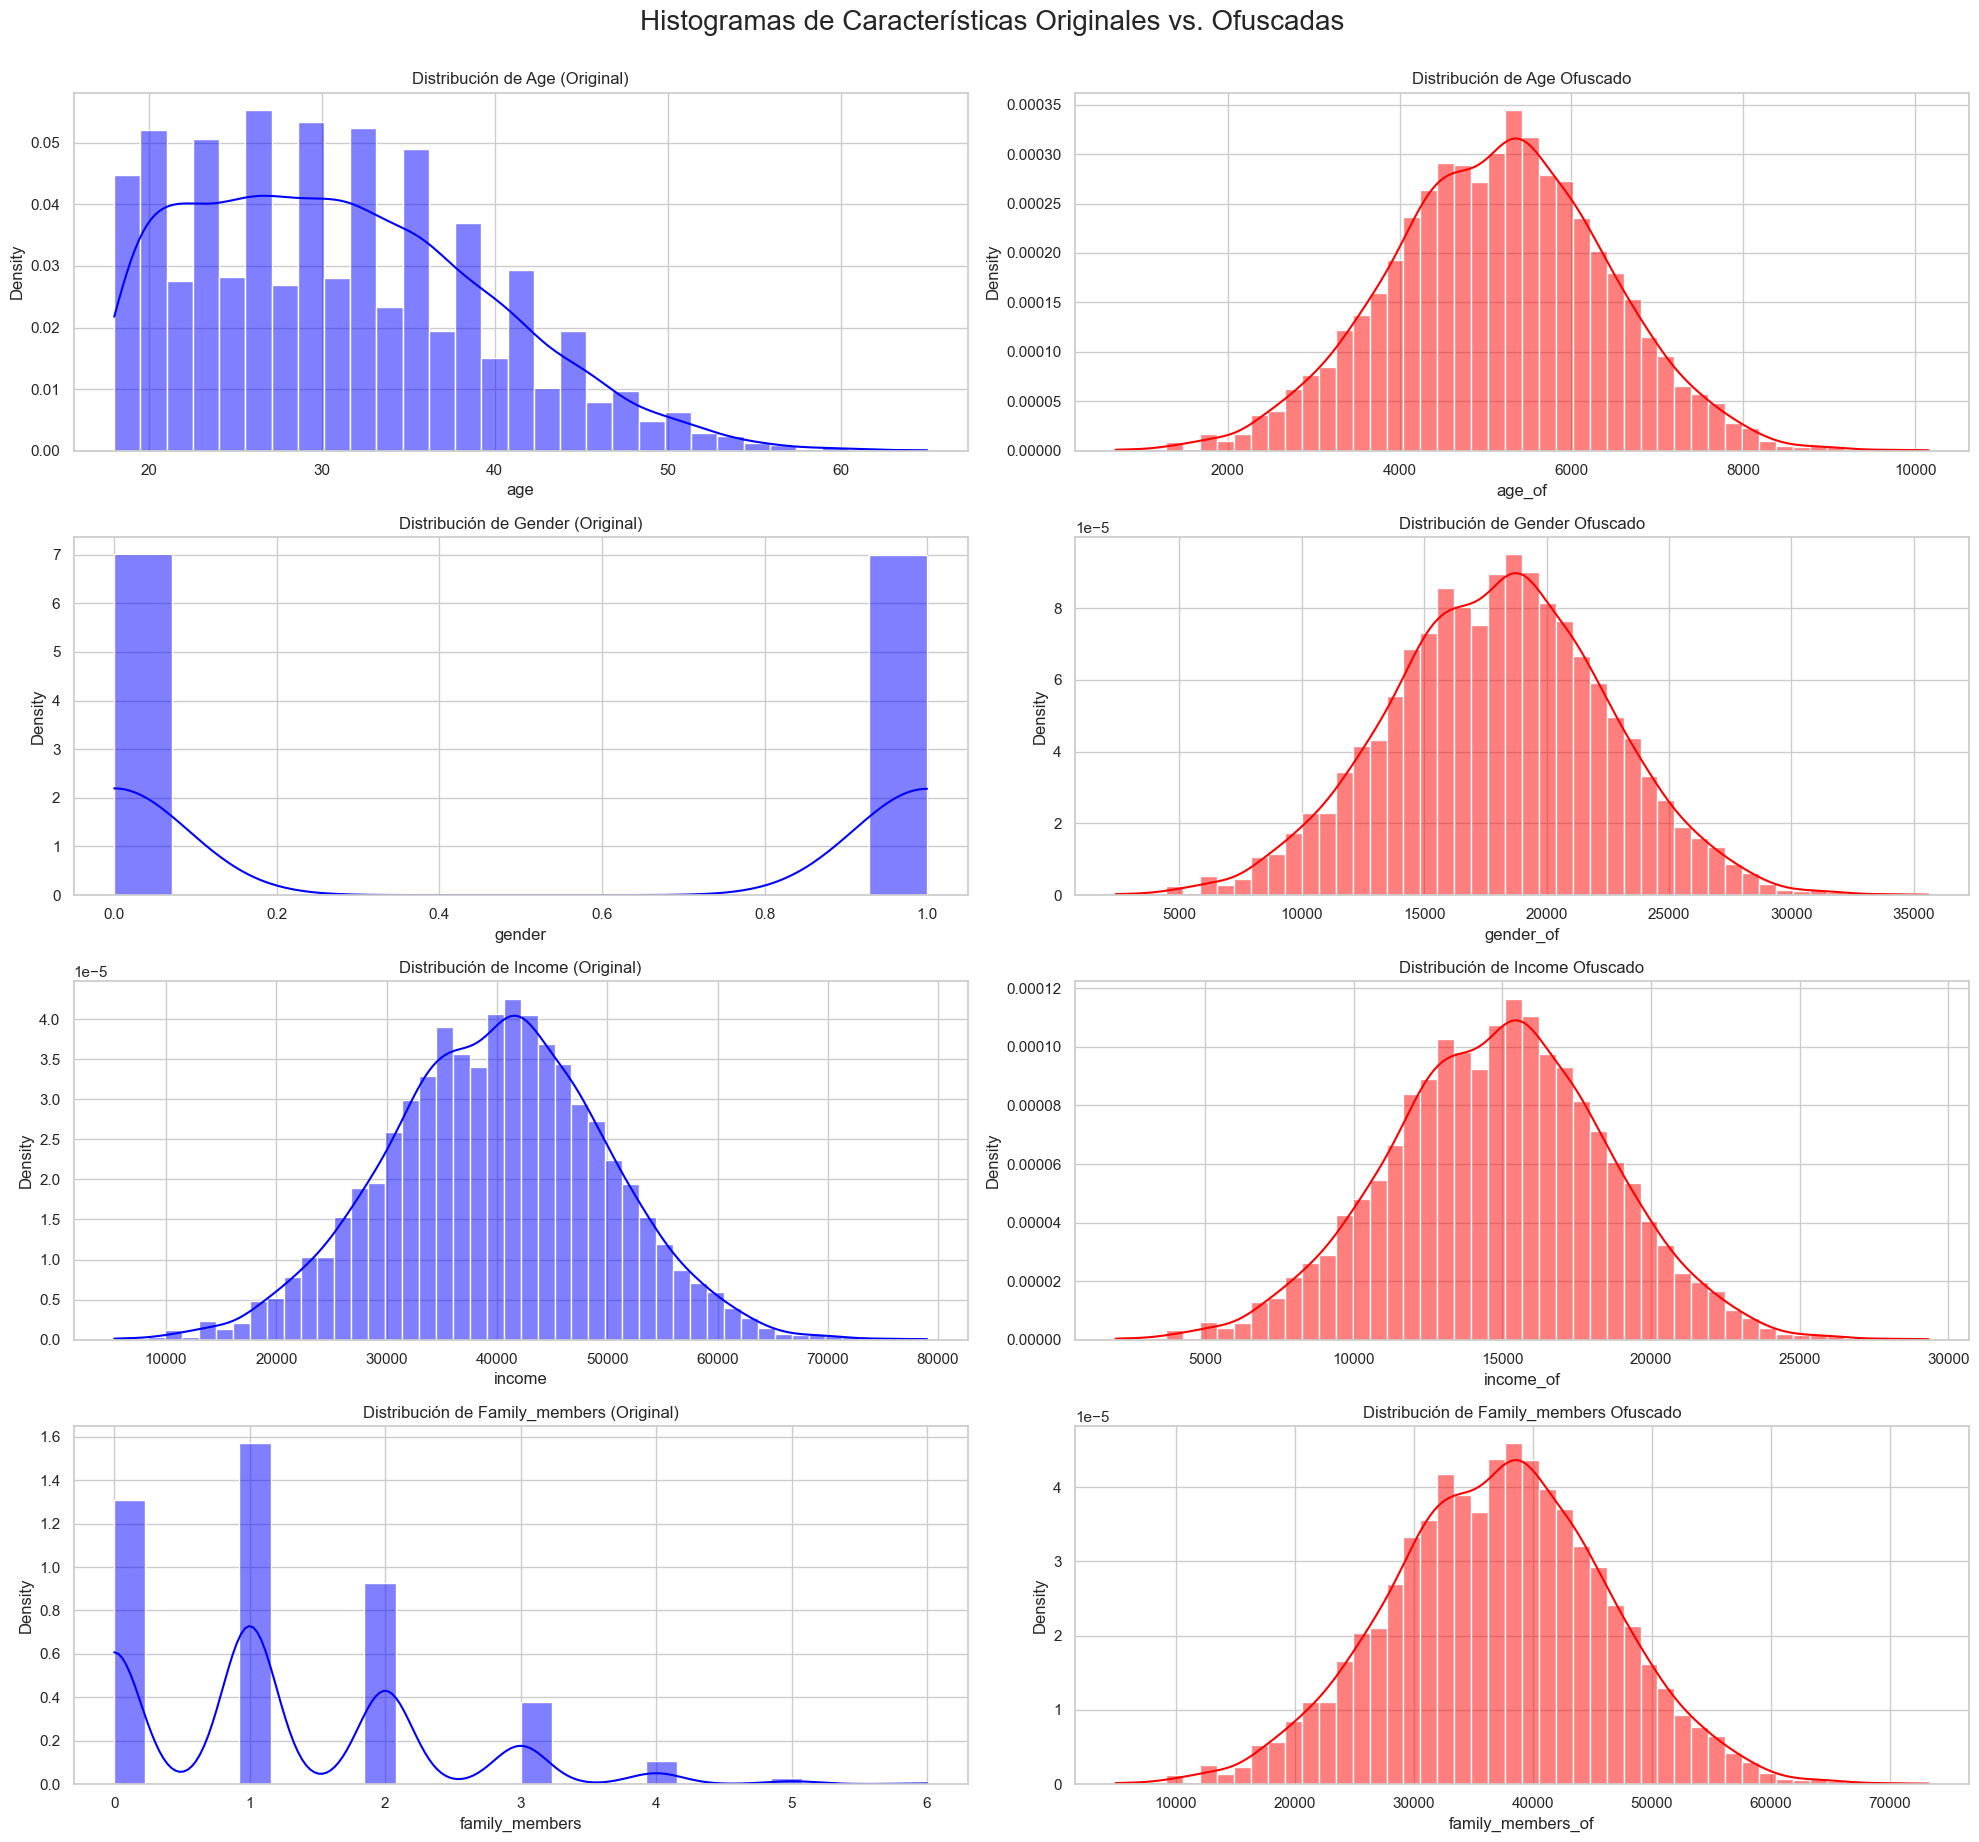

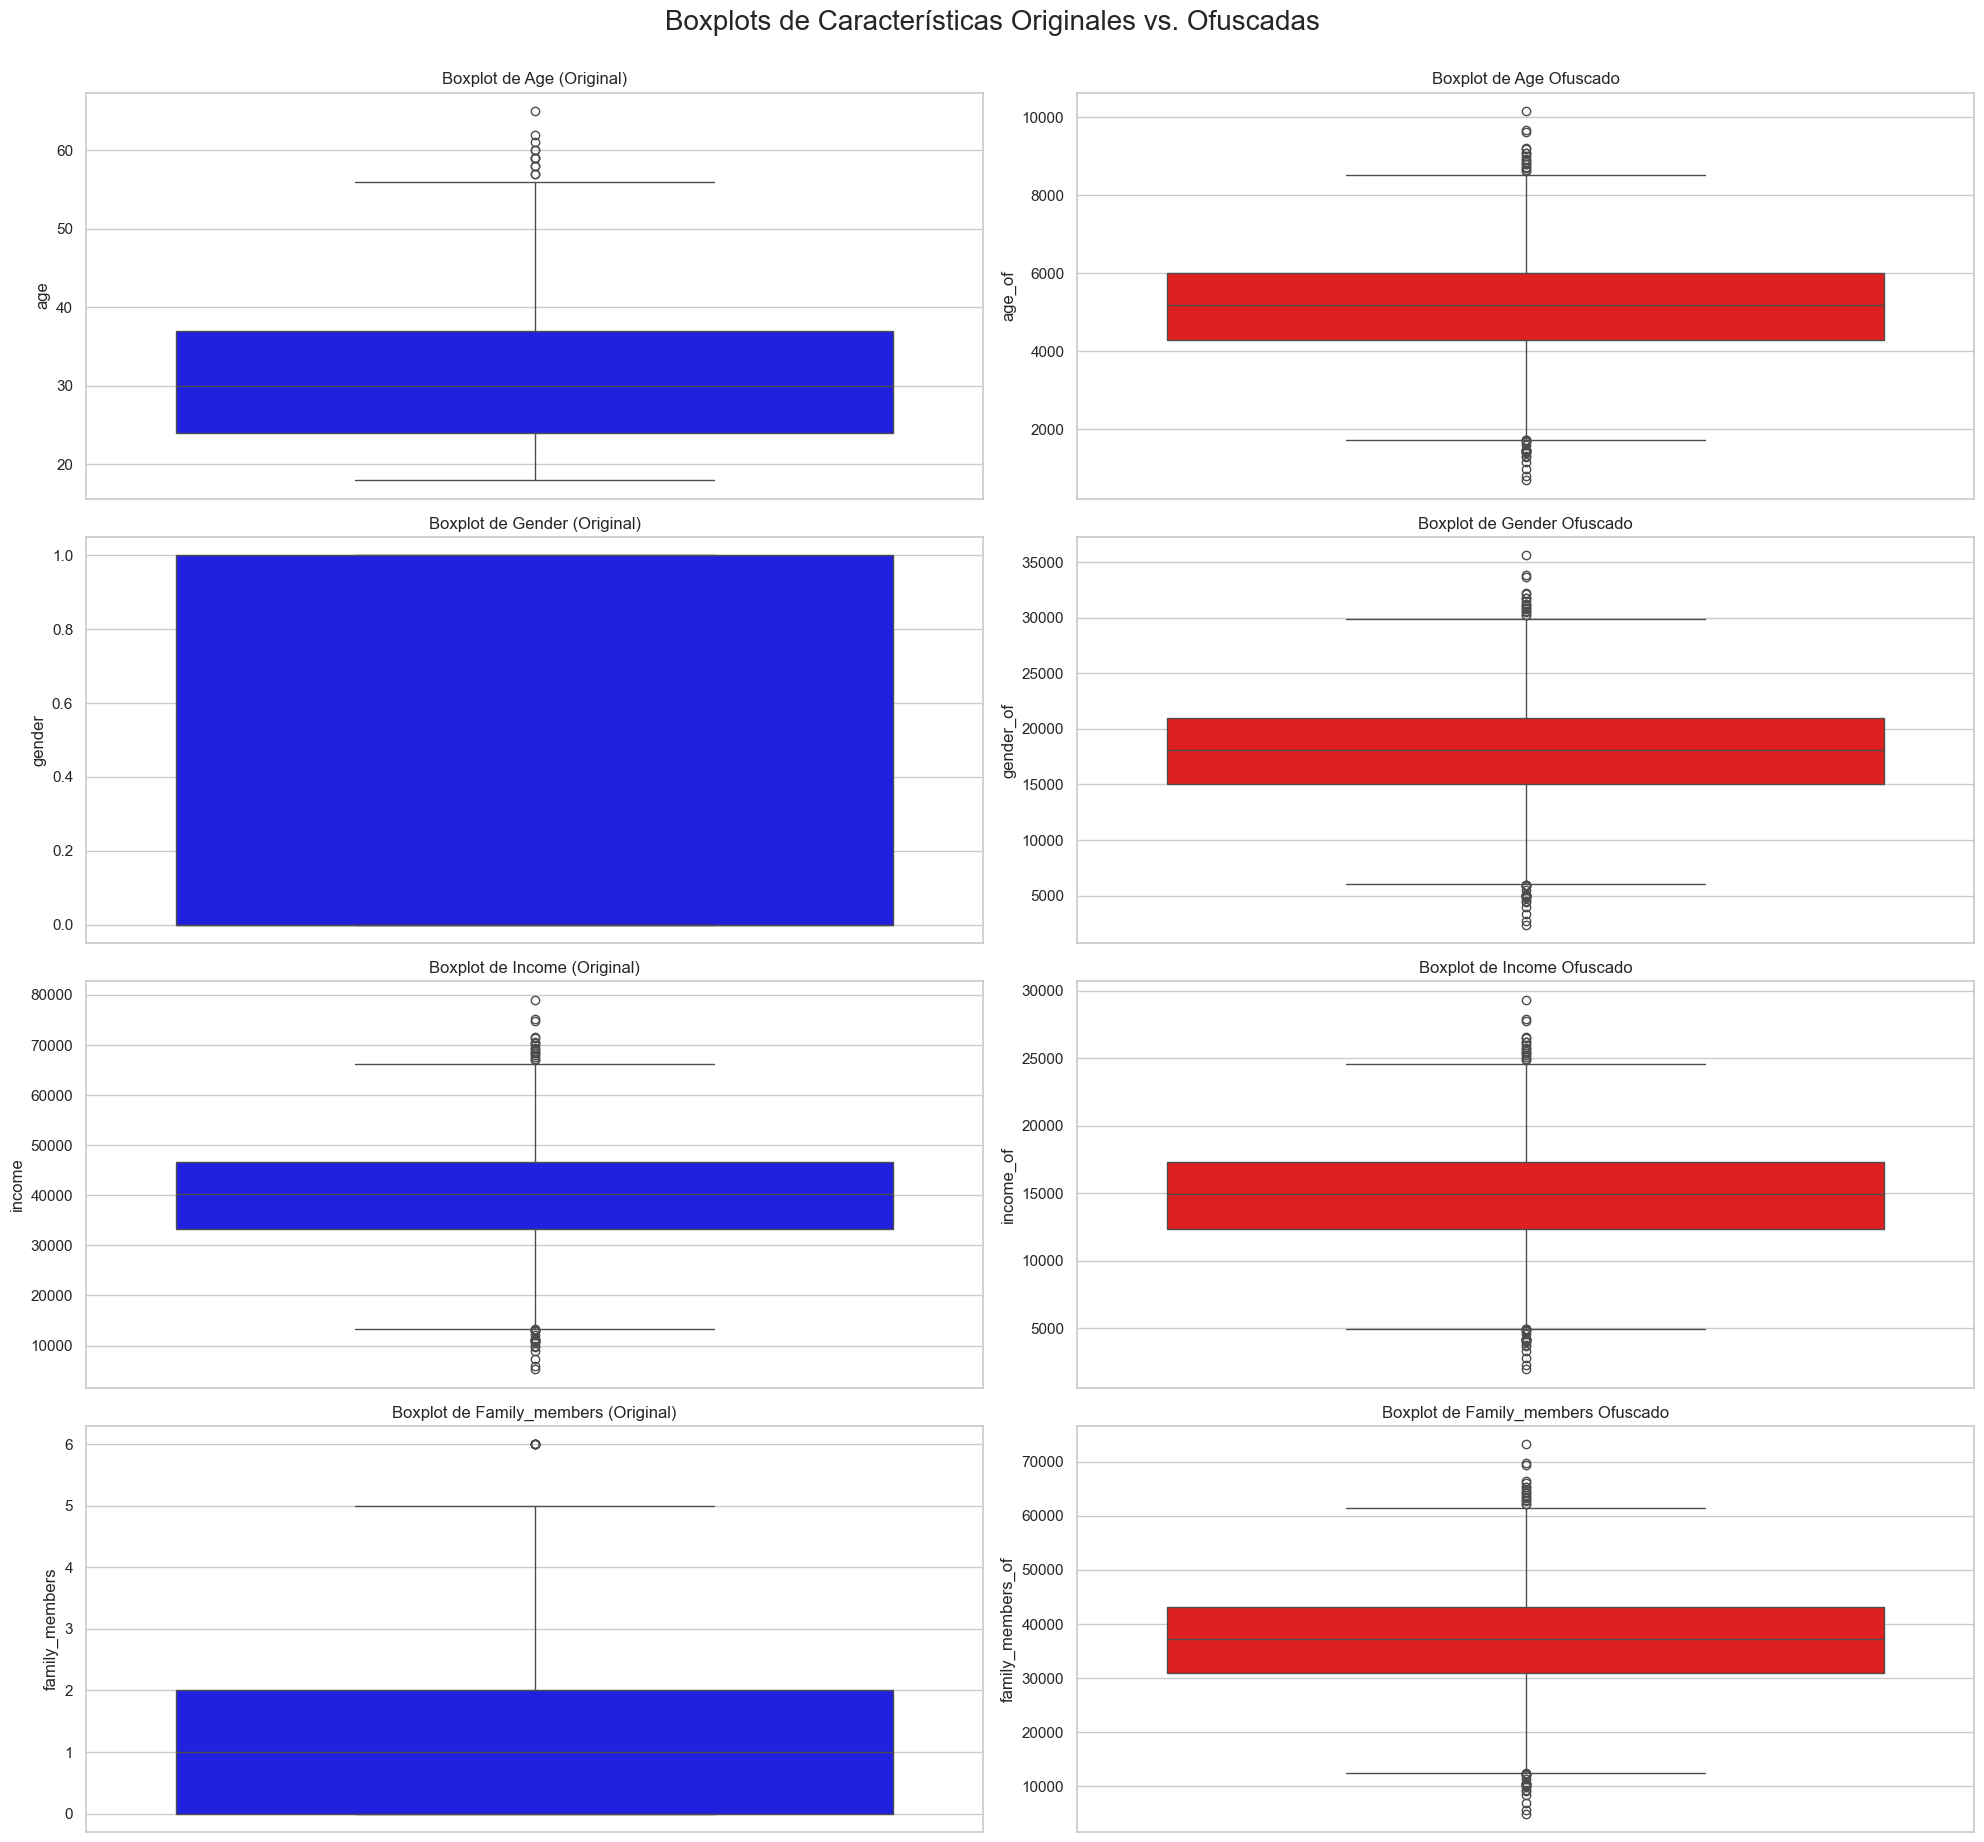

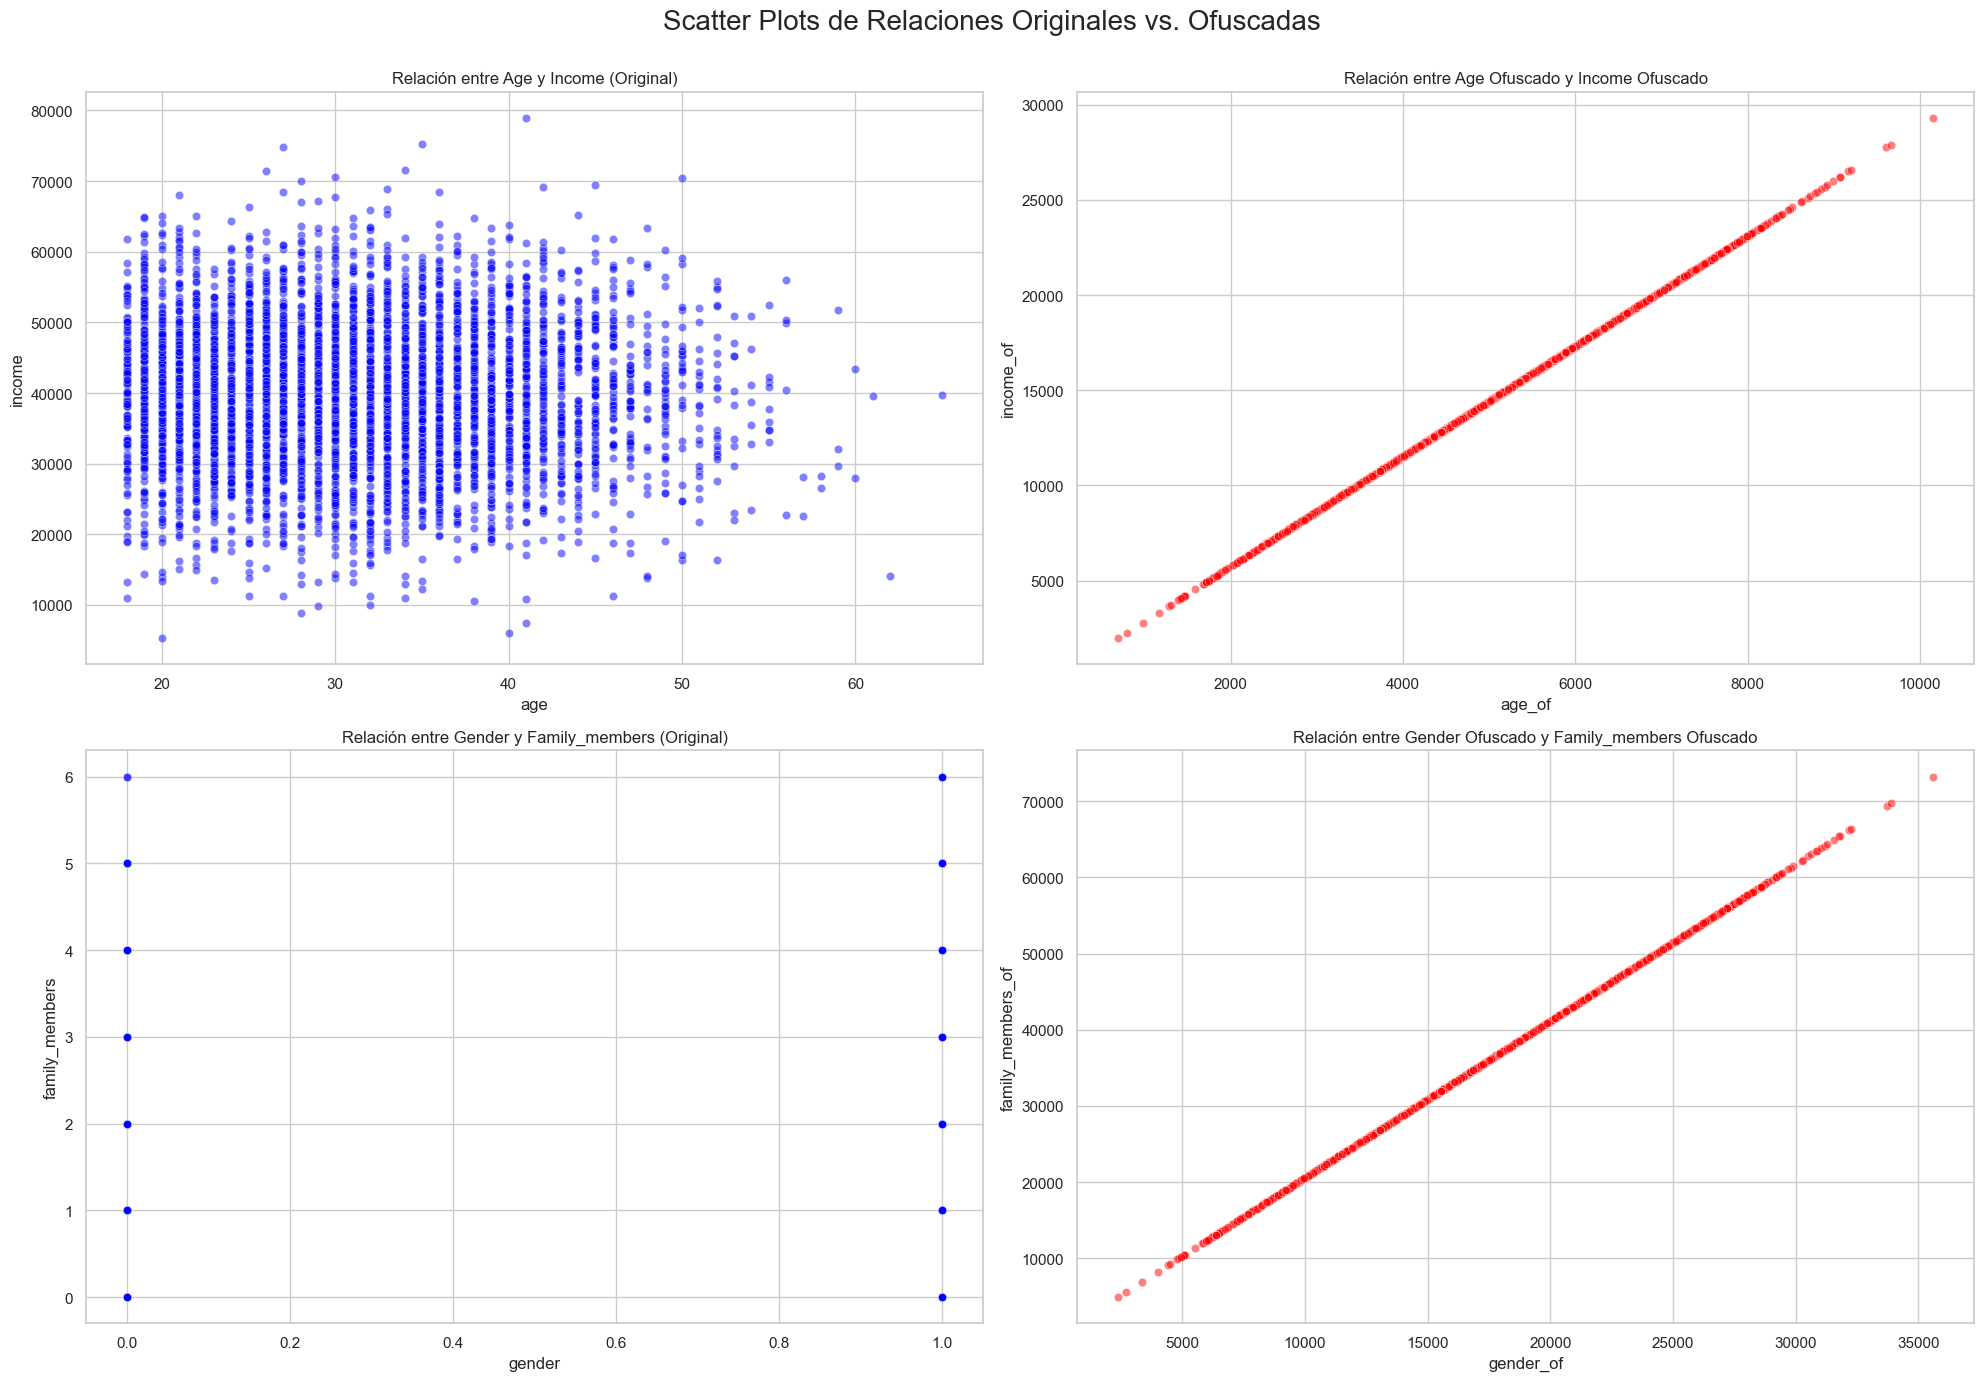

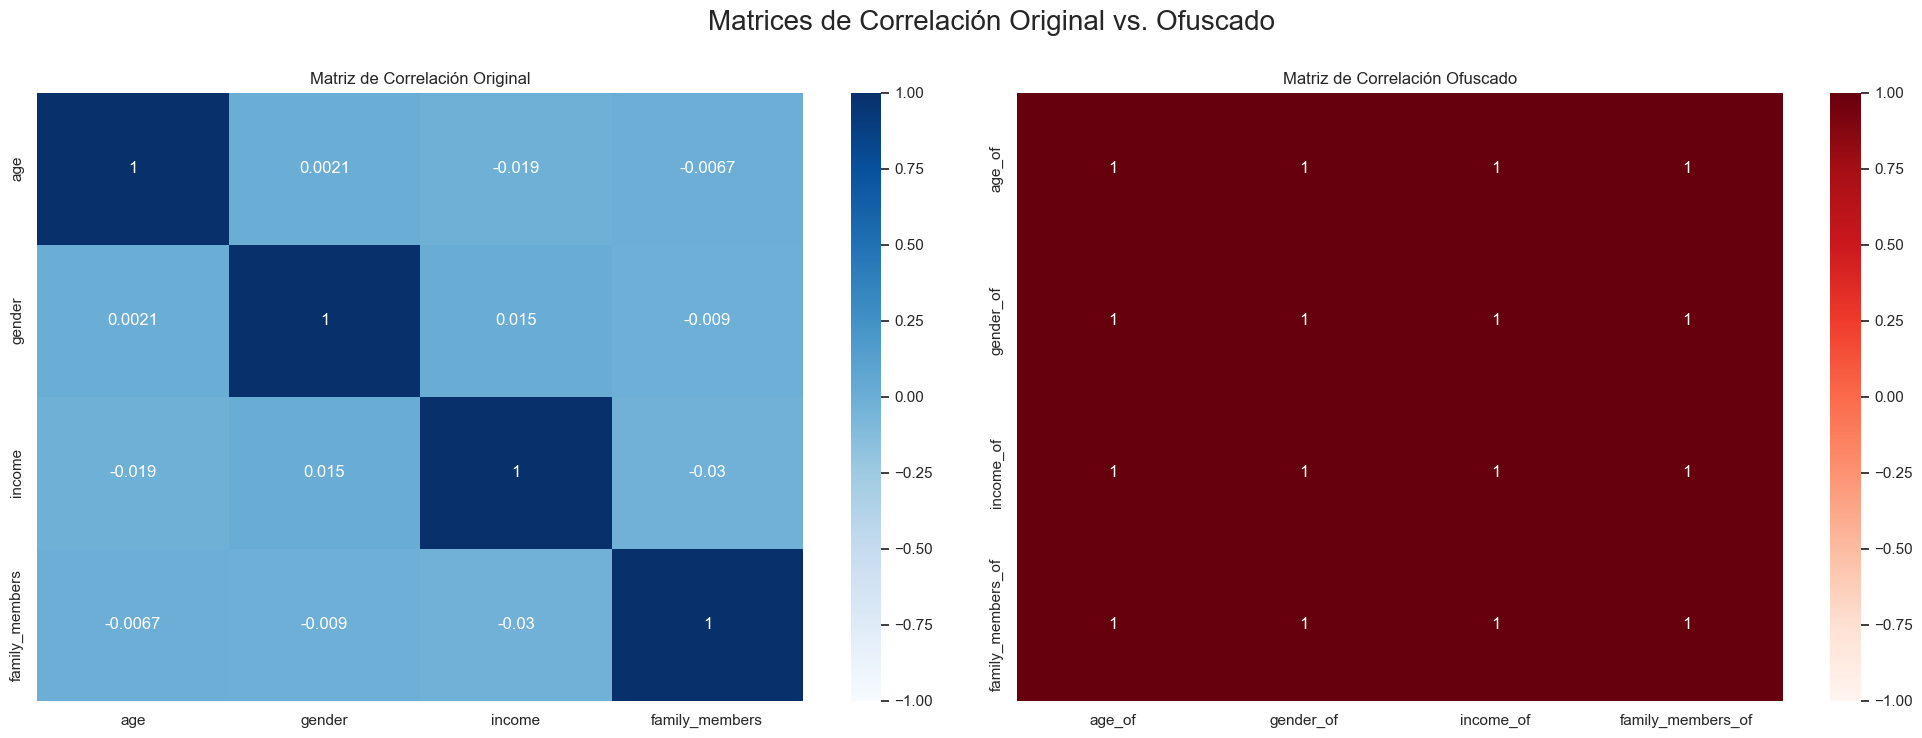

c:\Users\rulloa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\rulloa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\rulloa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\rulloa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\rulloa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

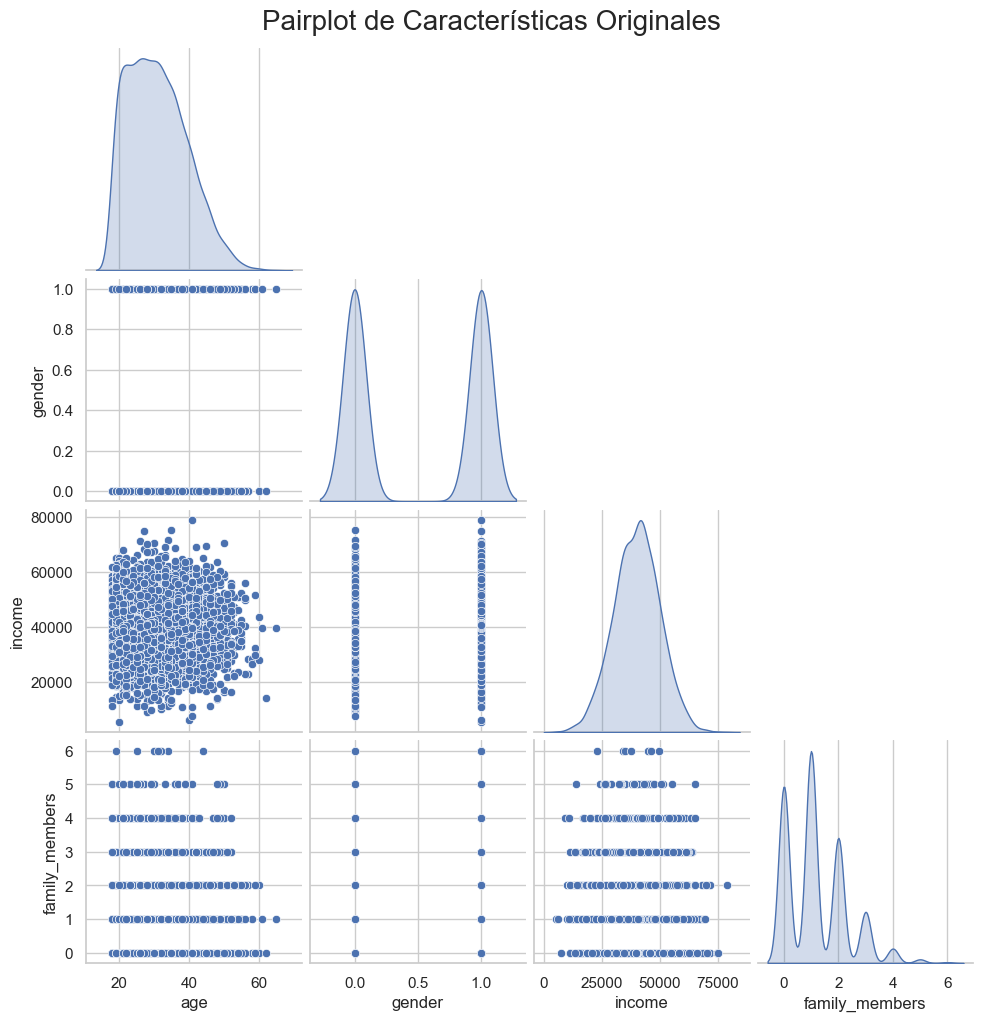

c:\Users\rulloa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\rulloa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\rulloa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\rulloa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\rulloa\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

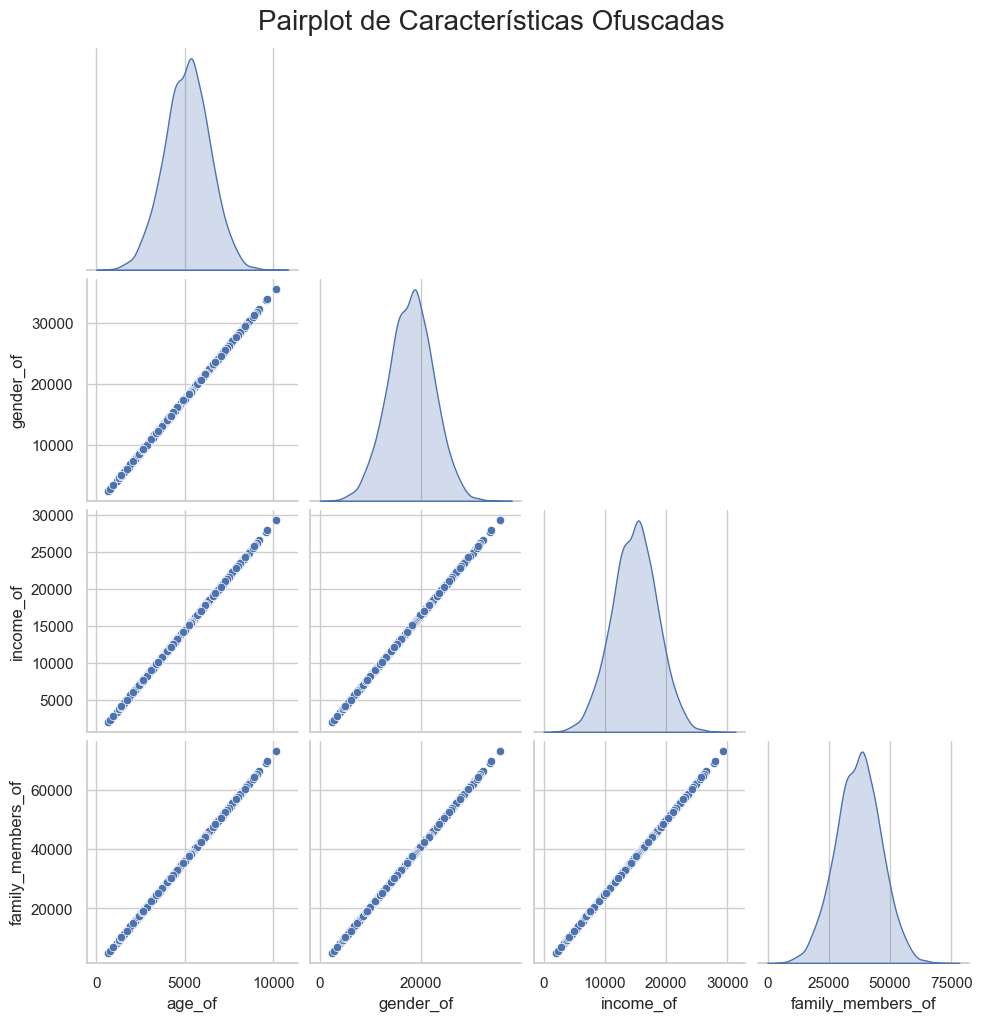

In [320]:
# Configuraci√≥n de estilo
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (20, 25)  # Ajusta el tama√±o de la figura seg√∫n tus necesidades


# 1. Histogramas de las Caracter√≠sticas Originales y Ofuscadas
original_features = ['age', 'gender', 'income', 'family_members']
ofuscated_features = ['age_of', 'gender_of', 'income_of', 'family_members_of']

fig_hist, axes_hist = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
fig_hist.suptitle('Histogramas de Caracter√≠sticas Originales vs. Ofuscadas', fontsize=20, y=0.95)

for i in range(4):
    # Histograma Original
    sns.histplot(df[original_features[i]], color='blue', kde=True, stat="density", ax=axes_hist[i,0])
    axes_hist[i,0].set_title(f'Distribuci√≥n de {original_features[i].capitalize()} (Original)')
    
    # Histograma Ofuscado
    sns.histplot(df_ofuscado[ofuscated_features[i]], color='red', kde=True, stat="density", ax=axes_hist[i,1])
    axes_hist[i,1].set_title(f'Distribuci√≥n de {original_features[i].capitalize()} Ofuscado')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 2. Boxplots Comparativos
fig_box, axes_box = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
fig_box.suptitle('Boxplots de Caracter√≠sticas Originales vs. Ofuscadas', fontsize=20, y=0.95)

for i in range(4):
    # Boxplot Original
    sns.boxplot(y=df[original_features[i]], color='blue', ax=axes_box[i,0])
    axes_box[i,0].set_title(f'Boxplot de {original_features[i].capitalize()} (Original)')
    
    # Boxplot Ofuscado
    sns.boxplot(y=df_ofuscado[ofuscated_features[i]], color='red', ax=axes_box[i,1])
    axes_box[i,1].set_title(f'Boxplot de {original_features[i].capitalize()} Ofuscado')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3. Scatter Plots Comparativos para Relaciones entre Caracter√≠sticas
pairs = [('age', 'income'), ('gender', 'family_members')]

fig_scatter, axes_scatter = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
fig_scatter.suptitle('Scatter Plots de Relaciones Originales vs. Ofuscadas', fontsize=20, y=0.95)

for i, (orig_pair, ofusc_pair) in enumerate(zip(pairs, pairs)):
    # Scatter Plot Original
    sns.scatterplot(x=df[orig_pair[0]], y=df[orig_pair[1]], ax=axes_scatter[i,0], alpha=0.5, color='blue')
    axes_scatter[i,0].set_title(f'Relaci√≥n entre {orig_pair[0].capitalize()} y {orig_pair[1].capitalize()} (Original)')
    
    # Scatter Plot Ofuscado
    sns.scatterplot(x=df_ofuscado[ofusc_pair[0] + '_of'], y=df_ofuscado[ofusc_pair[1] + '_of'], ax=axes_scatter[i,1], alpha=0.5, color='red')
    axes_scatter[i,1].set_title(f'Relaci√≥n entre {orig_pair[0].capitalize()} Ofuscado y {orig_pair[1].capitalize()} Ofuscado')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 4. Matrices de Correlaci√≥n Comparativas
corr_original = df[original_features].corr()
corr_ofuscado = df_ofuscado[ofuscated_features].corr()

fig_corr, axes_corr = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig_corr.suptitle('Matrices de Correlaci√≥n Original vs. Ofuscado', fontsize=20, y=0.95)

# Heatmap de Correlaci√≥n Original
sns.heatmap(corr_original, annot=True, cmap='Blues', ax=axes_corr[0], vmin=-1, vmax=1)
axes_corr[0].set_title('Matriz de Correlaci√≥n Original')

# Heatmap de Correlaci√≥n Ofuscado
sns.heatmap(corr_ofuscado, annot=True, cmap='Reds', ax=axes_corr[1], vmin=-1, vmax=1)
axes_corr[1].set_title('Matriz de Correlaci√≥n Ofuscado')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 5. Pairplots Comparativos
# Nota: Los pairplots son gr√°ficos complejos y es recomendable generarlos en celdas separadas.
# Sin embargo, aqu√≠ los incluimos en una sola celda para cumplir con la solicitud.

# Pairplot Original
sns.pairplot(df[original_features], corner=True, diag_kind='kde', palette='Blues')
plt.suptitle('Pairplot de Caracter√≠sticas Originales', fontsize=20, y=1.02)
plt.show()

# Pairplot Ofuscado
sns.pairplot(df_ofuscado[ofuscated_features], corner=True, diag_kind='kde', palette='Reds')
plt.suptitle('Pairplot de Caracter√≠sticas Ofuscadas', fontsize=20, y=1.02)
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Como ya demostraste anteriormente no existe diferencias entre el RMSE y R2 usando los datos originales y los datos ofuscados.
</div>

# Conclusiones

<ul style="font-family: Arial, sans-serif; color: #333;"> <li><strong>Ofuscaci√≥n Efectiva sin Impacto en la Regresi√≥n Lineal:</strong> Multiplicar la matriz de caracter√≠sticas  ( X  ) por una matriz invertible  ( P  ) ofusca los datos, protegiendo la informaci√≥n personal sin afectar la capacidad del modelo de regresi√≥n lineal para realizar predicciones precisas.</li> <li><strong>Preservaci√≥n de las M√©tricas de Evaluaci√≥n:</strong> Las m√©tricas de evaluaci√≥n, como <strong>RMSE</strong> y <strong>R¬≤</strong>, permanecen inalteradas tras la ofuscaci√≥n, lo que demuestra que la calidad del modelo no se ve comprometida.< li> <li><strong>Recuperaci√≥n de Datos Originales:</strong> Es posible recuperar los datos originales a partir de los datos ofuscados utilizando la matriz inversa  ( P^{-1}  ), asegurando la integridad y seguridad de los datos.</li> <li><strong>Importancia de la Matriz Invertible  ( P  ):</strong> La invertibilidad de  ( P  ) es crucial para garantizar que la transformaci√≥n sea reversible y que las relaciones lineales entre las variables se mantengan intactas.</li> <li><strong>Aplicabilidad en Protecci√≥n de Datos:</strong> Esta t√©cnica de ofuscaci√≥n es √∫til en contextos donde se requiere proteger datos sensibles sin sacrificar la funcionalidad de los modelos de machine learning utilizados para an√°lisis y predicciones.</li> </ul>

### üìä Conclusiones del An√°lisis de Datos Originales vs. Ofuscados

<table style="width:100%; border-collapse: collapse; font-family: Arial, sans-serif;">
    <thead>
        <tr style="background-color: #4CAF50; color: white;">
            <th style="border: 1px solid #dddddd; padding: 12px; text-align: left;">Aspecto Analizado</th>
            <th style="border: 1px solid #dddddd; padding: 12px; text-align: left;">Observaci√≥n</th>
        </tr>
    </thead>
    <tbody>
        <tr style="background-color: #f9f9f9;">
            <td style="border: 1px solid #dddddd; padding: 8px;">Distribuciones de las Variables</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">Las distribuciones de las variables originales muestran mayor variabilidad, mientras que las distribuciones ofuscadas tienden a una forma m√°s normalizada y reducen los outliers.</td>
        </tr>
        <tr>
            <td style="border: 1px solid #dddddd; padding: 8px;">Relaciones entre Variables (Scatter Plots)</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">En los datos originales, las relaciones no muestran correlaciones claras; sin embargo, en los datos ofuscados, las relaciones se vuelven casi lineales, indicando una fuerte correlaci√≥n introducida por la ofuscaci√≥n.</td>
        </tr>
        <tr style="background-color: #f9f9f9;">
            <td style="border: 1px solid #dddddd; padding: 8px;">Boxplots Comparativos</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">Los boxplots de los datos originales muestran una mayor dispersi√≥n y valores at√≠picos, mientras que los datos ofuscados tienden a normalizarse, reduciendo la varianza.</td>
        </tr>
        <tr>
            <td style="border: 1px solid #dddddd; padding: 8px;">Matrices de Correlaci√≥n</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">La matriz de correlaci√≥n de los datos originales muestra relaciones bajas entre las variables, mientras que la matriz de los datos ofuscados tiene correlaciones cercanas a 1, lo que sugiere que las transformaciones han introducido correlaciones artificiales.</td>
        </tr>
        <tr style="background-color: #f9f9f9;">
            <td style="border: 1px solid #dddddd; padding: 8px;">Distribuci√≥n de la Edad</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">La distribuci√≥n original de la edad muestra una mayor concentraci√≥n alrededor de los 30 a√±os, mientras que la versi√≥n ofuscada desplaza y transforma estos valores manteniendo la forma general.</td>
        </tr>
        <tr>
            <td style="border: 1px solid #dddddd; padding: 8px;">Conclusi√≥n General</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">El proceso de ofuscaci√≥n ha preservado algunas caracter√≠sticas de las distribuciones originales, pero ha introducido fuertes correlaciones lineales entre las variables. Esto puede tener implicaciones en la calidad de los modelos predictivos.</td>
        </tr>    
    </tbody>
</table>


# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook est√° abierto
- [X]  El c√≥digo no tiene errores- [ ]  Las celdas est√°n ordenadas de acuerdo con la l√≥gica y el orden de ejecuci√≥n
- [X]  Se ha realizado la tarea 1
    - [X]  Est√° presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [X]  Se prob√≥ el procedimiento para las cuatro combinaciones propuestas    - [ ]  Se respondieron las preguntas sobre la escala/distancia- [ ]  Se ha realizado la tarea 2
    - [X]  Se construy√≥ y prob√≥ el modelo de clasificaci√≥n aleatoria para todos los niveles de probabilidad    - [ ]  Se construy√≥ y prob√≥ el modelo de clasificaci√≥n kNN tanto para los datos originales como para los escalados. Se calcul√≥ la m√©trica F1.- [ ]  Se ha realizado la tarea 3
    - [X]  Se implement√≥ la soluci√≥n de regresi√≥n lineal mediante operaciones matriciales    - [ ]  Se calcul√≥ la RECM para la soluci√≥n implementada- [ ]  Se ha realizado la tarea 4
    - [X]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P    - [ ]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos    - [X]  Se proporcion√≥ la prueba anal√≠tica de que la transformaci√≥n no afecta a la RECM    - [ ]  Se proporcion√≥ la prueba computacional de que la transformaci√≥n no afecta a la RECM- [X]  Se han sacado conclusiones

# Ap√©ndices

## Ap√©ndice A: Escribir f√≥rmulas en los cuadernos de Jupyter

Puedes escribir f√≥rmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicaci√≥n de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las f√≥rmulas se ver√°n como las de los libros de texto.

Para incorporar una f√≥rmula a un texto, pon el signo de d√≥lar (\\$) antes y despu√©s del texto de la f√≥rmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una f√≥rmula debe estar en el mismo p√°rrafo, pon el doble signo de d√≥lar (\\$\\$) antes y despu√©s del texto de la f√≥rmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan f√≥rmulas en sus art√≠culos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en ingl√©s) de dos p√°ginas para aprender a componer las f√≥rmulas m√°s comunes.

## Ap√©ndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al √°lgebra lineal. Aqu√≠ se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba anal√≠tica de este proyecto.

### üìö Propiedades de las Matrices

<table style="width:100%; border-collapse: collapse; font-family: Arial, sans-serif;">
    <thead>
        <tr style="background-color: #4CAF50; color: white;">
            <th style="border: 1px solid #dddddd; padding: 12px; text-align: left;">Propiedad</th>
            <th style="border: 1px solid #dddddd; padding: 12px; text-align: left;">F√≥rmula</th>
        </tr>
    </thead>
    <tbody>
        <tr style="background-color: #f9f9f9;">
            <td style="border: 1px solid #dddddd; padding: 8px;">Distributividad</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">$ A(B + C) = AB + AC$</td>
        </tr>
        <tr>
            <td style="border: 1px solid #dddddd; padding: 8px;">No Conmutatividad</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">$ AB \neq BA$</td>
        </tr>
        <tr style="background-color: #f9f9f9;">
            <td style="border: 1px solid #dddddd; padding: 8px;">Propiedad Asociativa de la Multiplicaci√≥n</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">$ (AB)C = A(BC)$</td>
        </tr>
        <tr>
            <td style="border: 1px solid #dddddd; padding: 8px;">Propiedad de Identidad Multiplicativa</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">$ IA = AI = A$</td>
        </tr>
        <tr style="background-color: #f9f9f9;">
            <td style="border: 1px solid #dddddd; padding: 8px;">Propiedad del Inverso Multiplicativo</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">$ A^{-1}A = AA^{-1} = I$</td>
        </tr>    
        <tr>
            <td style="border: 1px solid #dddddd; padding: 8px;">Propiedad del Inverso de un Producto</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">$ (AB)^{-1} = B^{-1}A^{-1}$</td>
        </tr>    
        <tr style="background-color: #f9f9f9;">
            <td style="border: 1px solid #dddddd; padding: 8px;">Reversibilidad de la Transposici√≥n de un Producto de Matrices</td>
            <td style="border: 1px solid #dddddd; padding: 8px;">$ (AB)^T = B^TA^T$</td>
        </tr>    
    </tbody>
</table>


In [321]:
if not error_occurred:
    print("‚úÖ ¬°Todo el notebook se ejecut√≥ correctamente y no hubo errores!")
else:
    print("‚ùå Se detectaron errores durante la ejecuci√≥n del notebook.")


‚úÖ ¬°Todo el notebook se ejecut√≥ correctamente y no hubo errores!


<div class="alert alert-block alert-success">
<b>Resumen de la revisi√≥n</b> <a class="tocSkip"></a>

Muy buen trabajo, Rubintel! Realizaste un excelente trabajo con el an√°lisis de clusters y de las pruebas siguientes donde escalamos y ofuscamos los datos. Adem√°s, agregaste valiosas interpretaciones para complementar los resultados. Sigue esforz√°ndote!
</div>

<div class="alert alert-block alert-info"> 
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

¬°Muchas gracias por tus comentarios positivos! Aprecio mucho tu reconocimiento al esfuerzo realizado en el an√°lisis de clusters y la ofuscaci√≥n de datos. Continuar√© trabajando para mejorar la calidad de mis an√°lisis y agregar interpretaciones m√°s detalladas que complementen los resultados obtenidos. Estoy comprometido a seguir esforz√°ndome y aprendiendo de cada revisi√≥n.

¬°Gracias de nuevo por tu orientaci√≥n!
</div>
